In [1]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
print('pandas', sns.__version__)

#from venn import venn
import plotly.express as px

from sklearn.preprocessing import StandardScaler
#import GEOparse ## pip install GEOparse

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

python 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy 1.21.5
pandas 1.4.4
matplotlib 3.5.2
pandas 0.11.2


* breast cancer

# preproc data from geo, ctcr, ccle

## geo

### metastasis data from geo 1

In [15]:
def get_id2sym(geo_plat_file):
    id2sym=pd.read_table(geo_plat_file, usecols=['ID','Gene Symbol'],index_col=0)['Gene Symbol']
    id2sym=id2sym.loc[id2sym.notnull()]
    return id2sym

def get_geo_exp_with_sym(geo_exp_file):
    global id2sym
    geo = pd.read_table(geo_exp_file)

    geo_sym=pd.DataFrame(columns=geo.columns)
    geo_sym.loc[0]=geo.loc[0]

    row_cnt=1
    for ii in range(1,len(geo)):
        idRef=geo.loc[ii,'ID_REF']
        if idRef in id2sym.index:
            for sym in id2sym.loc[idRef].split(' /// '):
                row=geo.loc[ii]
                row.loc['ID_REF']=sym
                geo_sym.loc[row_cnt]=row
                row_cnt+=1
        if ii%1000==0:
            print(ii)

    return geo_sym

def mean_exp_by_sym_and_save(geo_exp_sym, save_file):
    geo_exp_slice=geo_exp_sym.iloc[1:]
    for col in geo_exp_slice.columns[1:]:
        geo_exp_slice[col]=geo_exp_slice[col].astype(float)
    
    geo_sym_mean=geo_exp_slice.groupby('ID_REF').mean().reset_index()
    geo_sym_mean=pd.concat([geo_exp_sym.iloc[[0]], geo_sym_mean], axis=0)
    geo_sym_mean

    geo_sym_mean.to_csv(save_file, sep='\t', index=False)

def change_column_name(geo):
    if '!Sample_source_name_ch1' in geo.index:
        geo.columns=geo.columns+'(' + geo.loc['!Sample_source_name_ch1'] + ')'
        geo=geo.drop(index='!Sample_source_name_ch1')
        return geo
    else:
        return geo

def z_score_norm(df1):
    scaler=StandardScaler()
    scaler.fit(df1.values)
    z_score=scaler.transform(df1.values)
    df2=pd.DataFrame(data=z_score, index=df1.index, columns=df1.columns)
    return df2

def draw_boxplots(exp, num_of_col, ran_col=False):
    fig=plt.figure(figsize=(20,3), dpi=100)
    axs=fig.subplots(1,num_of_col).flatten()
    
    if ran_col==False:
        for ii, col_ind in enumerate(exp.columns[:num_of_col]):
            exp[col_ind].plot.box(ax=axs[ii])
            
    if ran_col==True:
        for ii, col_ind in enumerate(np.random.choice(exp.columns, size=num_of_col)):
            exp[col_ind].plot.box(ax=axs[ii])
    fig.tight_layout()

In [3]:
# # probe_id to gene_symbol 얻기
# id2sym=get_id2sym("./data/geo/GPL570-55999.txt") 

# # gene symbol mapping된 geo_exp 파일 얻기
# geo_exp_sym=get_geo_exp_with_sym("./data/geo/GSE14017_series_matrix_cut.txt")

# # gene symbol 별 평균 expression 구하고 저장하기
# mean_exp_by_sym_and_save(geo_exp_sym, "data/geo/GSE14017_series_matrix_symbol.txt")

,GSM352095,GSM352097,GSM352098,GSM352100,GSM352101,GSM352103,GSM352105,GSM352107,GSM352109,GSM352110,...,GSM352123,GSM352124,GSM352125,GSM352126,GSM352127,GSM352128,GSM352129,GSM352130,GSM352131,GSM352132
ID_REF,,,,,,,,,,,,,,,,,,,,,
!Sample_source_name_ch1,Lung,Brain,Brain,Bone,Brain,Bone,Bone,Brain,Bone,Brain,...,Bone,Bone,Brain,Bone,Lung,Brain,Brain,Brain,Bone,Lung
A1BG,8.233864938,6.905280507,7.711297469,7.377047361,7.452669191,7.452807091,7.818691728,6.924453454,7.376692251,6.935478022,...,7.278351295,7.006980225,7.647207295,8.069226097,7.362257654,7.461495847,7.019096993,7.359823712,6.989958017,6.970766663
A1BG-AS1,6.907603133,6.267598848,6.817026072,6.35224196,6.578819234,7.323382036,6.216989092,6.154517542,6.321350089,6.266114562,...,6.648630058,6.552051768,6.537998432,6.451256429,6.191622453,6.392561978,6.530066547,6.577189395,6.055361399,6.296595574
A1CF,5.3199283145,8.6110271965,5.3414107315,5.335601988,5.4093209345,5.3991383695,5.4654872,5.293623531,5.2985511899999995,5.3521980515,...,5.364416253,5.489853333,5.431579213,5.417037454,5.6419607334999995,5.4772358765,5.836853322,5.4838152825,5.443518505,5.334857528
A2M,9.2238287475,9.0734440295,8.901604161,9.3522401485,8.717713054499999,8.55122046,9.7535403745,9.54096492,9.249298901,9.403312660000001,...,9.0136618135,9.1038818415,8.8684679565,9.3645108875,9.9962109025,8.157091041,8.7259590275,8.5916865625,8.573083705,9.213540517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hADV36S1,4.157365152,4.190443058,4.27485929,4.268192665,4.221361028,4.37110983,4.322807639,4.204162293,4.285969173,4.285256442,...,4.104777786,4.26979147,4.368271366,4.227887325,4.226528318,4.24417124,4.466001039,4.473880005,4.29085377,4.267972441
hsa-let-7a-3,7.1416721375000005,7.1937306385,7.425011963999999,7.1967957245,7.147841452,8.2392709515,7.871768878,7.350809282,7.4634930745,7.8430188554999996,...,8.4590288555,7.8589189565,8.0098054995,7.5819936295,7.4241502805,7.767165233,7.663018319000001,7.4185218525,7.873732435499999,7.033322695500001
hsa-let-7b,7.1416721375000005,7.1937306385,7.425011963999999,7.1967957245,7.147841452,8.2392709515,7.871768878,7.350809282,7.4634930745,7.8430188554999996,...,8.4590288555,7.8589189565,8.0098054995,7.5819936295,7.4241502805,7.767165233,7.663018319000001,7.4185218525,7.873732435499999,7.033322695500001


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


,GSM352095(Lung),GSM352097(Brain),GSM352098(Brain),GSM352100(Bone),GSM352101(Brain),GSM352103(Bone),GSM352105(Bone),GSM352107(Brain),GSM352109(Bone),GSM352110(Brain),...,GSM352123(Bone),GSM352124(Bone),GSM352125(Brain),GSM352126(Bone),GSM352127(Lung),GSM352128(Brain),GSM352129(Brain),GSM352130(Brain),GSM352131(Bone),GSM352132(Lung)
ID_REF,,,,,,,,,,,,,,,,,,,,,
A1BG,0.501337,-0.230881,0.241228,0.063233,0.107921,0.114509,0.297598,-0.192703,0.047929,-0.199870,...,-0.007201,-0.155640,0.197238,0.437543,0.037334,0.096004,-0.150683,0.054240,-0.163646,-0.179071
A1BG-AS1,-0.214389,-0.589908,-0.251818,-0.506116,-0.376887,0.040652,-0.581868,-0.613532,-0.533221,-0.574429,...,-0.360288,-0.414578,-0.416911,-0.462535,-0.637676,-0.492913,-0.431020,-0.379478,-0.674672,-0.544890
A1CF,-1.071189,0.729485,-1.065379,-1.070928,-1.025721,-1.057427,-0.994505,-1.084076,-1.096450,-1.085834,...,-1.080351,-1.019164,-1.029516,-1.037872,-0.954620,-0.997201,-0.828404,-0.985400,-1.009219,-1.066749
A2M,1.035578,0.989834,0.897488,1.160587,0.809763,0.741324,1.359989,1.237421,1.079125,1.181069,...,0.965793,1.037881,0.873429,1.158111,1.556118,0.479234,0.827775,0.736910,0.701986,1.037905
A2M-AS1,-0.073981,-0.775011,-0.716298,-0.032413,-0.520600,-0.292840,0.315808,0.099028,-0.227172,-0.648803,...,-0.273300,-0.130309,-0.200993,0.124868,0.022187,-0.944047,-0.729592,-0.470648,-0.588322,-0.439237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hADV36S1,-1.698574,-1.759384,-1.653409,-1.663946,-1.684796,-1.644076,-1.621930,-1.679550,-1.654053,-1.682868,...,-1.786634,-1.713603,-1.618252,-1.699397,-1.770784,-1.676543,-1.614244,-1.545083,-1.639481,-1.645662
hsa-let-7a-3,-0.088072,-0.068479,0.083388,-0.036909,-0.061196,0.563309,0.326742,0.040333,0.095728,0.307967,...,0.654808,0.329269,0.398003,0.166495,0.073022,0.264409,0.218444,0.086769,0.319590,-0.145126
hsa-let-7b,-0.088072,-0.068479,0.083388,-0.036909,-0.061196,0.563309,0.326742,0.040333,0.095728,0.307967,...,0.654808,0.329269,0.398003,0.166495,0.073022,0.264409,0.218444,0.086769,0.319590,-0.145126


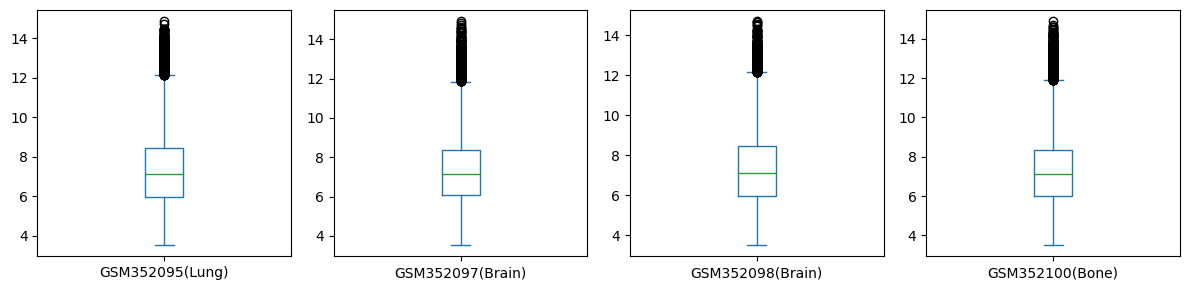

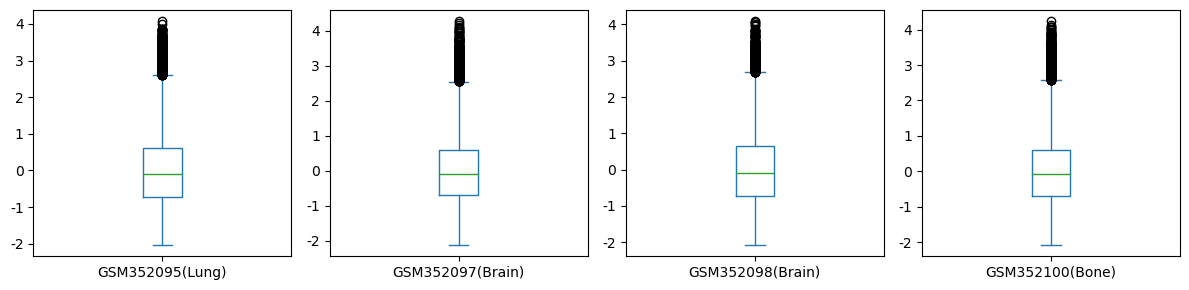

In [3]:
# 저장한 파일 로드하기
met_geo=pd.read_table("./data/geo/GSE14017/GSE14017_series_matrix_symbol.txt", sep='\t',index_col=0)
met_geo
# met. target tissue column 이름에 붙이기
met_geo=change_column_name(met_geo).astype(float)

draw_boxplots(met_geo, num_of_col=4)


# #### z-score normalization
met_geo_norm=z_score_norm(met_geo)
met_geo_norm
## boxplot of some cols
draw_boxplots(met_geo_norm, num_of_col=4)

### metastasis data from geo 2

In [5]:
# #probe_id to gene_symbol 얻기
# id2sym=get_id2sym("./data/geo/GSE46141/GPL10379.txt") 

# #gene symbol mapping된 geo_exp 파일 얻기
# geo_exp_sym=get_geo_exp_with_sym("./data/geo/GSE46141/GSE46141_series_matrix_cut.txt")

# #gene symbol 별 평균 expression 구하고 저장하기
# mean_exp_by_sym_and_save(geo_exp_sym, "data/geo/GSE46141/GSE46141_series_matrix_symbol.txt")

/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3054797091.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  met_geo2=pd.read_table("./data/geo/GSE46141/GSE46141_series_matrix_symbol.txt", sep='\t',index_col=0)


,GSM1124867,GSM1124868,GSM1124869,GSM1124870,GSM1124871,GSM1124872,GSM1124873,GSM1124874,GSM1124875,GSM1124876,...,GSM1124948,GSM1124949,GSM1124950,GSM1124951,GSM1124952,GSM1124953,GSM1124954,GSM1124955,GSM1124956,GSM1124957
ID_REF,,,,,,,,,,,,,,,,,,,,,
!Sample_source_name_ch1,liver,liver,breast,breast,lymph node,skin local-regional,skin local-regional,lymph node,lymph node,skin local-regional,...,lymph node,lymph node,lymph node,liver,liver,bone,lymph node,lymph node,lymph node,liver
A1BG,6.53,6.45,5.83,5.5,6.7,4.93,6.33,6.51,6.95,5.53,...,6.03,5.53,6.18,5.99,8.19,5.07,5.43,7.6,6.28,7.0
A1CF,3.21,4.18,2.47,2.71,2.93,2.63,2.52,2.6,2.89,2.84,...,2.65,2.38,2.26,2.86,6.08,2.68,3.07,2.83,3.3,4.86
A2LD1,6.326666666666667,5.733333333333333,5.046666666666667,4.923333333333333,6.703333333333333,6.23,4.61,6.16,4.6466666666666665,4.866666666666666,...,4.71,6.503333333333333,5.306666666666667,5.236666666666667,6.026666666666666,6.926666666666667,5.2,4.776666666666666,5.8566666666666665,5.593333333333334
A2M,12.2,8.95,11.78,10.97,8.8,10.39,10.05,8.72,10.74,11.89,...,11.11,12.21,9.88,9.58,11.21,7.87,12.23,12.36,10.5,9.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcag7.1058,3.76,3.74,3.61,2.69,3.02,3.12,3.19,3.01,3.36,2.9,...,2.99,2.87,3.45,3.52,3.41,2.84,2.96,3.22,2.98,3.17
tcag7.1188,3.07,3.11,2.92,4.31,2.86,3.01,3.14,3.34,3.14,3.38,...,3.17,7.0,2.99,2.86,2.73,2.97,5.67,3.29,4.06,3.24
tcag7.1196,6.87,6.53,7.23,6.41,6.4,6.4,6.32,7.64,8.33,7.85,...,7.65,8.24,7.12,8.76,5.37,7.1,6.22,5.37,7.3,8.24


,GSM1124867(liver),GSM1124868(liver),GSM1124869(breast),GSM1124870(breast),GSM1124871(lymph node),GSM1124872(skin local-regional),GSM1124873(skin local-regional),GSM1124874(lymph node),GSM1124875(lymph node),GSM1124876(skin local-regional),...,GSM1124948(lymph node),GSM1124949(lymph node),GSM1124950(lymph node),GSM1124951(liver),GSM1124952(liver),GSM1124953(bone),GSM1124954(lymph node),GSM1124955(lymph node),GSM1124956(lymph node),GSM1124957(liver)
ID_REF,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.149419,-0.129499,-0.415085,-0.543600,-0.056093,-0.744037,-0.210760,-0.130492,0.048855,-0.478649,...,-0.327627,-0.527089,-0.269504,-0.326069,0.503214,-0.660611,-0.538428,0.291922,-0.205049,0.077838
A1CF,-1.422855,-0.994238,-1.700409,-1.620281,-1.480629,-1.623401,-1.674227,-1.614651,-1.509212,-1.517021,...,-1.632053,-1.737870,-1.765470,-1.531297,-0.306879,-1.556401,-1.569727,-1.559568,-1.370040,-0.748787
A2LD1,-0.227410,-0.402507,-0.714739,-0.766140,-0.054833,-0.247005,-0.871433,-0.263346,-0.835073,-0.734703,...,-0.837048,-0.152963,-0.602789,-0.616145,-0.327355,0.035281,-0.638936,-0.803963,-0.370545,-0.465520
A2M,2.025395,0.822856,1.861008,1.567310,0.737416,1.343497,1.218138,0.708380,1.503308,1.976387,...,1.632870,2.040538,1.142506,1.056285,1.662684,0.388850,2.433109,2.139530,1.444705,1.101463
A4GALT,-0.333530,-0.171403,-0.522196,-0.663232,-0.554869,-0.552871,-0.479638,-0.331670,-0.680290,-0.524970,...,-0.601634,-0.038932,-0.765615,-0.572506,-0.583309,-0.585650,-0.171356,-0.084586,-0.169864,-0.509298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tcag7.1058,-1.211894,-1.161852,-1.264317,-1.627999,-1.446621,-1.436058,-1.416872,-1.459023,-1.328845,-1.493860,...,-1.500838,-1.549527,-1.311337,-1.277159,-1.331973,-1.496432,-1.617796,-1.408188,-1.495140,-1.401590
tcag7.1188,-1.476554,-1.401846,-1.528267,-1.002830,-1.507079,-1.478115,-1.436078,-1.333762,-1.413272,-1.308574,...,-1.431372,0.037943,-1.486884,-1.531297,-1.593046,-1.447707,-0.433551,-1.381017,-1.072928,-1.374551
tcag7.1196,-0.019007,-0.099024,0.120466,-0.192425,-0.169451,-0.182009,-0.214601,0.298433,0.578445,0.416899,...,0.297570,0.514568,0.089223,0.740538,-0.579470,0.100248,-0.193206,-0.573659,0.193707,0.556817


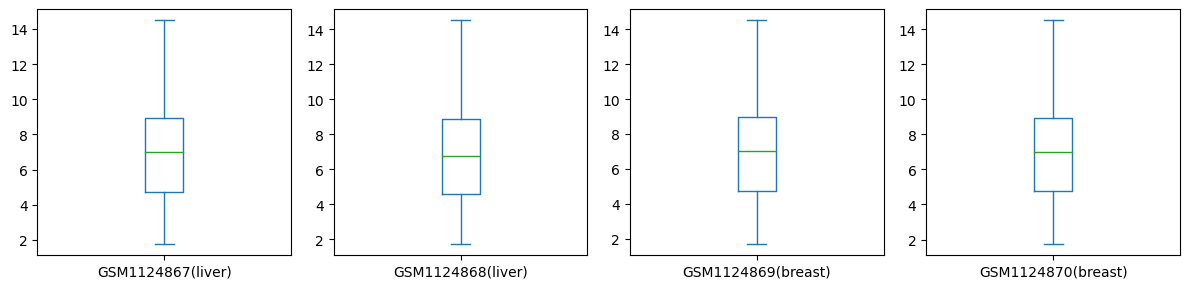

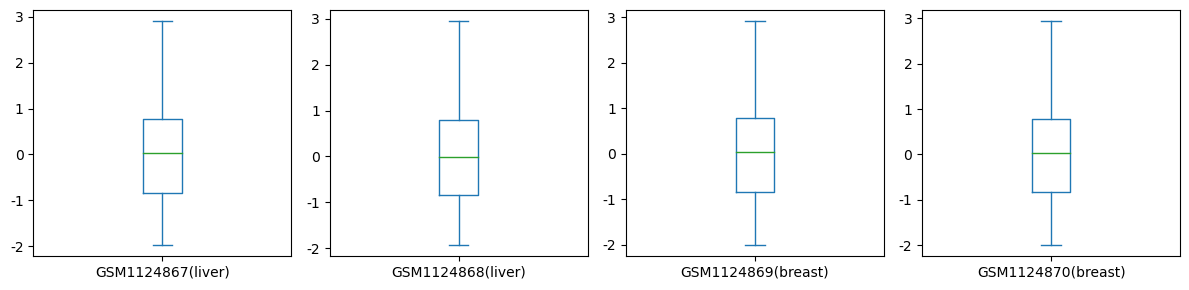

In [5]:
# 저장한 파일 로드하기
met_geo2=pd.read_table("./data/geo/GSE46141/GSE46141_series_matrix_symbol.txt", sep='\t',index_col=0)
met_geo2

### met. target tissue column 이름에 붙이기
met_geo2=change_column_name(met_geo2).astype(float)
## boxplot of some cols
draw_boxplots(met_geo2, num_of_col=4)

# #### z-score normalization
met_geo_norm2=z_score_norm(met_geo2)
met_geo_norm2
## boxplot of some cols
draw_boxplots(met_geo_norm2, num_of_col=4)

### metastasis data from geo 3

In [7]:
# probe_id to gene_symbol 얻기
# id2sym=get_id2sym("./data/geo/GSE14018/GPL96-57554.txt") 

# gene symbol mapping된 geo_exp 파일 얻기
# geo_exp_sym=get_geo_exp_with_sym("./data/geo/GSE14018/GSE14018_series_matrix_cut.txt")

# gene symbol 별 평균 expression 구하고 저장하기
# mean_exp_by_sym_and_save(geo_exp_sym, "data/geo/GSE14018/GSE14018_series_matrix_symbol.txt")

,GSM352133,GSM352134,GSM352135,GSM352136,GSM352137,GSM352138,GSM352139,GSM352140,GSM352141,GSM352142,...,GSM352159,GSM352160,GSM352161,GSM352162,GSM352163,GSM352164,GSM352165,GSM352166,GSM352167,GSM352168
ID_REF,,,,,,,,,,,,,,,,,,,,,
!Sample_source_name_ch1,Lung,Lung,Lung,Liver,Brain,Lung,Liver,Brain,Lung,Brain,...,Bone,Lung,Lung,Liver,Bone,Lung,Lung,Lung,Bone,Lung
A1CF,6.91540439511721,7.11835898038402,7.34752655505592,7.12756743521841,7.6263999927925,7.3075922071007,9.99820333249785,9.52430866455117,7.44351940975143,7.17933538897454,...,7.60911810694335,7.75211798838907,7.6406875143604,9.86942309017195,7.68015653870842,7.19425005131105,7.40546231015631,7.50795192098439,7.45970183045286,8.09675257062624
A2M,10.2018296301167,10.7256015201257,12.3172361097263,10.0803925328604,10.0386185670087,9.95868027753447,12.0430022342489,10.794498615855,11.6577819943586,10.9371924594625,...,10.1251669671893,11.1358457280826,12.6982537982496,10.8348455600753,10.2724944912681,11.0769328574811,11.2476075123848,12.5712090508137,11.3484691509412,11.503884501386
A4GALT,6.80234937439287,6.57161572752687,6.91980017888678,6.74853800861834,6.84503878445854,6.45664248087067,6.39375659873346,6.62441641304416,6.73981863591772,6.57731542299961,...,6.63692816074381,6.53908653091687,6.59041238212409,6.36013217215347,6.88727323532996,6.52463330802321,6.55143889677492,6.41045264428702,6.66818607403247,6.79940739747173
A4GNT,6.73943211091721,7.09974961998314,7.24560987703815,6.9926310536715,7.08602623000351,7.09393541439281,7.012960416645,7.06188230097568,7.16718312622528,6.96618197189483,...,7.17685028745715,6.98968285526097,7.08208930339053,7.01549748696884,7.28902244266899,6.95990883593295,7.02717116135167,7.12270048124476,7.12645817424794,7.18722826142169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,8.973207262845904,9.473776897159116,9.72361466671411,8.790916732441154,9.52501572938022,8.343763846746906,8.221644916977075,8.479711127899574,8.994893265777154,8.77488706033214,...,8.702862071800855,9.81588482825981,9.45273621632961,8.95780742931997,9.25591400375514,8.544524872771245,9.717102756443534,9.118132287130505,9.43432587517619,9.171234540566704
ZZEF1,7.122756655278633,6.85492326369605,7.178535267499936,6.837730914769286,7.031348220009657,6.83500598123132,6.76131077284619,6.992640885937007,6.9535462109876605,6.726774872685387,...,6.66947390914098,6.817733787322631,6.88762730289248,6.957448652090226,6.95233585230104,6.802963984614688,7.070596821749277,6.85903777526676,7.222088359086624,6.990244277241257
ZZZ3,8.04068372088734,7.86478242418649,8.12869056849528,7.78927893278953,7.30682017719093,8.4715967007939,8.54017665094602,8.11654757509767,7.44593454234479,8.34463644361849,...,7.204523052474,8.26568537704652,8.34950085415966,8.43266251950798,7.58143550528617,8.22900985100967,7.7056720833877,7.64730793114941,7.85395530557495,7.23262910553296


,GSM352133(Lung),GSM352134(Lung),GSM352135(Lung),GSM352136(Liver),GSM352137(Brain),GSM352138(Lung),GSM352139(Liver),GSM352140(Brain),GSM352141(Lung),GSM352142(Brain),...,GSM352159(Bone),GSM352160(Lung),GSM352161(Lung),GSM352162(Liver),GSM352163(Bone),GSM352164(Lung),GSM352165(Lung),GSM352166(Lung),GSM352167(Bone),GSM352168(Lung)
ID_REF,,,,,,,,,,,,,,,,,,,,,
A1CF,-0.228329,-0.117833,0.032204,-0.104194,0.182697,-0.005778,1.608631,1.343936,0.082118,-0.074600,...,0.178943,0.253736,0.201002,1.559008,0.224953,-0.068701,0.049027,0.116386,0.104314,0.551069
A2M,1.684554,2.003434,3.059468,1.605659,1.665565,1.591413,2.836375,2.124112,2.692838,2.143758,...,1.740573,2.328760,3.276907,2.148337,1.822639,2.260213,2.330824,3.229663,2.487768,2.880478
A4GALT,-0.294134,-0.439350,-0.228342,-0.323674,-0.297631,-0.518447,-0.555560,-0.437233,-0.353822,-0.429987,...,-0.424463,-0.490139,-0.437754,-0.583191,-0.263710,-0.470352,-0.458165,-0.558441,-0.380812,-0.335907
A4GNT,-0.330755,-0.128776,-0.029878,-0.182330,-0.149489,-0.134499,-0.183776,-0.168533,-0.089071,-0.200429,...,-0.089351,-0.213817,-0.138726,-0.183132,-0.016107,-0.209264,-0.175635,-0.120496,-0.099934,-0.070760
AAAS,1.047112,0.909456,1.008928,0.916118,0.743155,0.814687,0.673071,0.936026,0.831794,0.839916,...,0.909906,0.771768,0.724625,0.855815,0.775594,0.652411,0.600137,0.652146,0.833852,0.709364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,0.969427,1.267288,1.479582,0.858980,1.349837,0.618480,0.541945,0.702324,1.043188,0.867295,...,0.857795,1.519313,1.303051,1.002525,1.196110,0.741222,1.421878,1.106448,1.314576,1.285678
ZZEF1,-0.107639,-0.272749,-0.070736,-0.272026,-0.183101,-0.290496,-0.334872,-0.211063,-0.221419,-0.341757,...,-0.404263,-0.319262,-0.256994,-0.218567,-0.223611,-0.303403,-0.149845,-0.282616,-0.041321,-0.205435
ZZZ3,0.426646,0.321107,0.508045,0.278974,-0.013759,0.695495,0.733199,0.479262,0.083614,0.613307,...,-0.072175,0.568674,0.632087,0.681957,0.164110,0.551969,0.227318,0.202073,0.345955,-0.039720


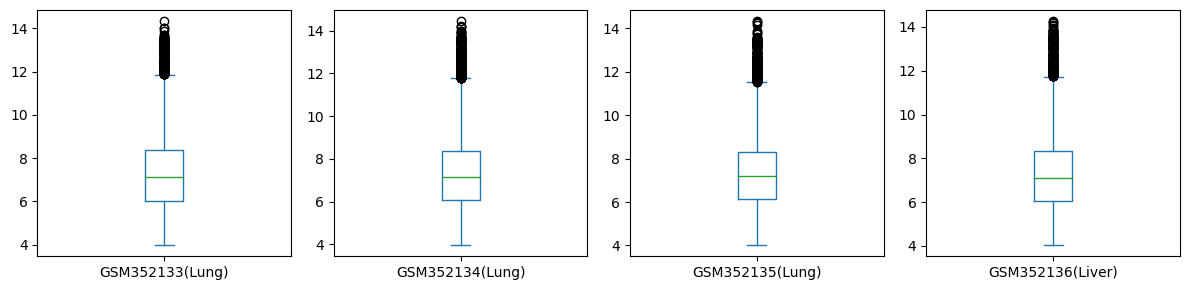

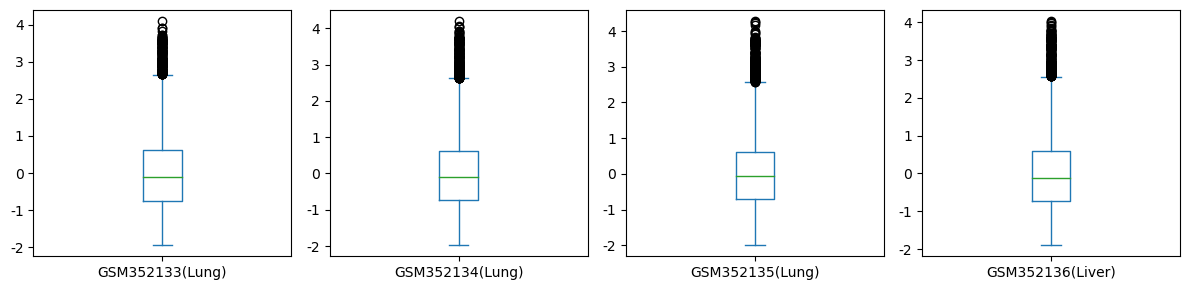

In [6]:
# 저장한 파일 로드하기
met_geo3=pd.read_table("./data/geo/GSE14018/GSE14018_series_matrix_symbol.txt", sep='\t',index_col=0)
met_geo3

### met. target tissue column 이름에 붙이기
met_geo3=change_column_name(met_geo3).astype(float)
## boxplot of some cols
draw_boxplots(met_geo3, num_of_col=4)

# #### z-score normalization
met_geo_norm3=z_score_norm(met_geo3)
met_geo_norm3
## boxplot of some cols
draw_boxplots(met_geo_norm3, num_of_col=4)

## ctc

### 1.2.1 function definition2

In [7]:
def get_mean_exp_ctc(exp):
    exp=exp.astype(float)
    exp.index=[sym.split('_')[1] for sym in exp.index]
    exp.index.name='gene'
    exp=exp.reset_index()
    exp_mean=exp.groupby('gene').mean()
    return exp_mean

### ctc data from ctcrbase 1

,GSM3021472(ctc),GSM3021473(ctc),GSM3021474(ctc),GSM3021475(ctc),GSM3021476(ctc),GSM3021477(ctc),GSM3021478(ctc),GSM3021479(ctc),GSM3021480(ctc),GSM3021481(ctc),...,GSM3021531(ctc),GSM3021538(ctc),GSM3021539(ctc),GSM3021540(ctc),GSM3021541(ctc),GSM3021542(ctc),GSM3021543(ctc),GSM3021544(ctc),GSM3021545(ctc),GSM3021546(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5S,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7SK,1.070756,1.028132,0.774989,0.0,0.301098,0.947923,1.290739,0.802312,0.814903,0.850533,...,0.689471,1.051341,0.771700,0.676503,0.920373,0.719312,0.847316,0.786964,0.830173,0.612728
A1BG,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.655352,5.190220,5.257011,4.541639,3.688180,4.394377,2.869871,4.383359,2.910733,4.348374
A1BG-AS1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.232661,0.000000,0.000000,0.000000,...,3.777157,0.000000,0.000000,0.847997,0.000000,3.544733,0.000000,0.000000,3.818646,2.879706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snoZ40,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snoZ6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,GSM3021472(ctc),GSM3021473(ctc),GSM3021474(ctc),GSM3021475(ctc),GSM3021476(ctc),GSM3021477(ctc),GSM3021478(ctc),GSM3021479(ctc),GSM3021480(ctc),GSM3021481(ctc),...,GSM3021531(ctc),GSM3021538(ctc),GSM3021539(ctc),GSM3021540(ctc),GSM3021541(ctc),GSM3021542(ctc),GSM3021543(ctc),GSM3021544(ctc),GSM3021545(ctc),GSM3021546(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543
5S,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543
7SK,0.118861,0.065009,0.334719,-0.305165,-0.222206,0.110538,0.161217,-0.080431,0.026181,0.326390,...,-0.117390,0.005907,-0.161652,-0.132348,-0.006763,-0.136874,-0.040826,-0.034281,-0.084925,-0.223309
A1BG,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,0.894002,2.103294,2.057920,1.858321,1.413712,1.800410,1.052422,1.849402,0.969598,1.655915
A1BG-AS1,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,0.131102,-0.494224,-0.410825,-0.236591,...,1.471140,-0.526862,-0.543531,-0.044023,-0.479110,1.352526,-0.498823,-0.446469,1.429770,0.917099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543
snoZ40,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543
snoZ6,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543


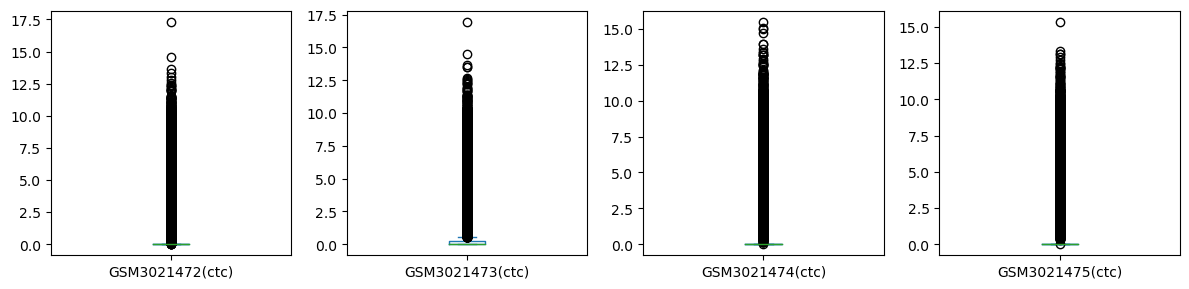

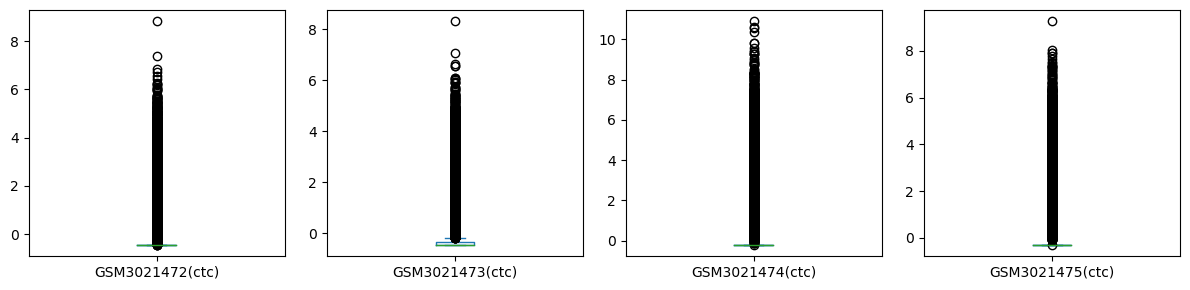

In [8]:
# 파일 로드하기
ctc_ctcr=pd.read_table("./data/ctcr/BR_GSE111065_gene_FPKM_mat.txt", index_col=0)

#### log scale로 변경
ctc_ctcr.columns=[col+'(ctc)' for col in ctc_ctcr.columns]
ctc_ctcr=ctc_ctcr.applymap(lambda x: np.log2(x+1))
#### gene symbol 별 평균 expression 구하기
ctc_ctcr=get_mean_exp_ctc(ctc_ctcr)
ctc_ctcr
## boxplot of some cols
draw_boxplots(ctc_ctcr, num_of_col=4)

# #### z-score normalization
ctc_ctcr_norm=z_score_norm(ctc_ctcr)
ctc_ctcr_norm

## boxplot of some cols
draw_boxplots(ctc_ctcr_norm, num_of_col=4)

### ctc data from ctcrbase 2

,GSM2314585(ctc),GSM2314587(ctc),GSM2314589(ctc),GSM2314591(ctc),GSM2314592(ctc),GSM2314594(ctc),GSM2314596(ctc),GSM2314598(ctc),GSM2314600(ctc),GSM2314602(ctc),...,GSM2314704(ctc),GSM2314717(ctc),GSM2314706(ctc),GSM2314719(ctc),GSM2314708(ctc),GSM2314710(ctc),GSM2314711(ctc),GSM2314713(ctc),GSM2314715(ctc),GSM2314720(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
5S,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7SK,0.28977,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.035852,0.19693,0.000000,0.0,0.000000,0.000000,0.230505,0.0
A1BG,0.00000,0.000000,0.000000,0.0,0.111031,0.0,0.0,0.0,0.0,0.0,...,0.137504,0.443607,0.028569,0.00000,0.070389,0.0,0.669027,0.084064,0.000000,0.0
A1BG-AS1,0.00000,0.084064,0.250962,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.189034,0.000000,0.00000,0.000000,0.0,0.000000,0.565597,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
snoZ40,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
snoZ6,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


,GSM2314585(ctc),GSM2314587(ctc),GSM2314589(ctc),GSM2314591(ctc),GSM2314592(ctc),GSM2314594(ctc),GSM2314596(ctc),GSM2314598(ctc),GSM2314600(ctc),GSM2314602(ctc),...,GSM2314704(ctc),GSM2314717(ctc),GSM2314706(ctc),GSM2314719(ctc),GSM2314708(ctc),GSM2314710(ctc),GSM2314711(ctc),GSM2314713(ctc),GSM2314715(ctc),GSM2314720(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635
5S,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635
7SK,-0.012255,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.287137,-0.035129,-0.159826,-0.245089,-0.224081,-0.220567,-0.172729,-0.191635
A1BG,-0.232107,-0.193402,-0.272256,-0.162954,-0.262952,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.115892,0.064728,-0.291819,-0.241824,-0.075511,-0.245089,0.303652,-0.148539,-0.319354,-0.191635
A1BG-AS1,-0.232107,-0.124043,-0.090463,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.119999,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,0.264047,-0.319354,-0.191635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635
snoZ40,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635
snoZ6,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635


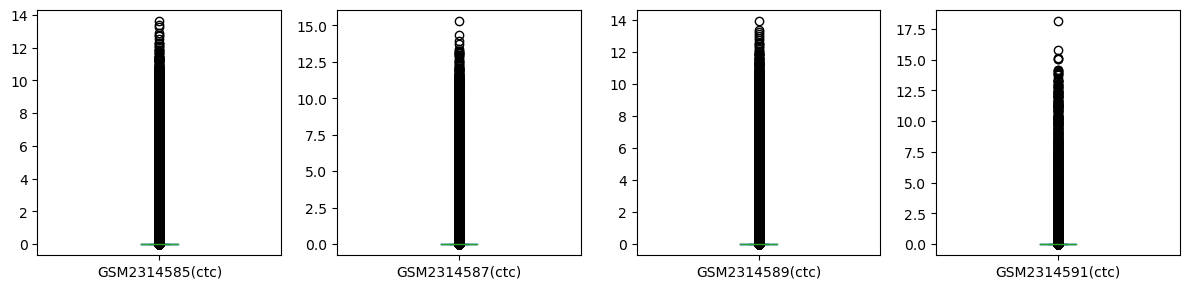

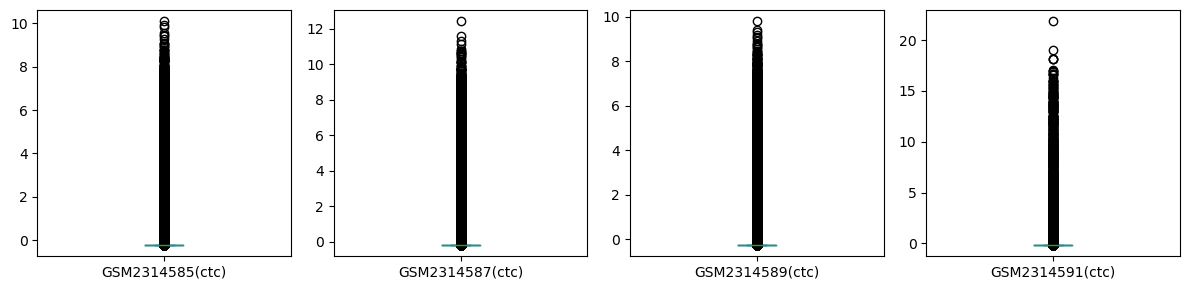

In [9]:
# 파일 로드하기
ctc_ctcr2=pd.read_table("./data/ctcr/BR_GSE86978_gene_FPKM_mat.txt", index_col=0)

#### log scale로 변경
ctc_ctcr2.columns=[col+'(ctc)' for col in ctc_ctcr2.columns]
ctc_ctcr2=ctc_ctcr2.applymap(lambda x: np.log2(x+1))
#### gene symbol 별 평균 expression 구하기
ctc_ctcr2=get_mean_exp_ctc(ctc_ctcr2)
ctc_ctcr2
## boxplot of some cols
draw_boxplots(ctc_ctcr2, num_of_col=4)

# #### z-score normalization
ctc_ctcr_norm2=z_score_norm(ctc_ctcr2)
ctc_ctcr_norm2

## boxplot of some cols
draw_boxplots(ctc_ctcr_norm2, num_of_col=4)

### ctc data from ctcrbase 3

,GSM2966592(ctc),GSM2966593(ctc),GSM2966594(ctc),GSM2966605(ctc),GSM2966606(ctc),GSM2966607(ctc),GSM2966611(ctc),GSM2966637(ctc),GSM2966638(ctc),GSM2966639(ctc),...,GSM2966724(ctc),GSM2966725(ctc),GSM2966726(ctc),GSM2966730(ctc),GSM2966731(ctc),GSM2966732(ctc),GSM2966733(ctc),GSM2966734(ctc),GSM2966735(ctc),GSM2966738(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5S,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7SK,1.047964,1.036311,0.0,1.019658,0.802312,0.805935,0.0,0.410263,0.988443,0.59513,...,0.816713,0.632419,0.827588,0.671333,0.0,0.847316,0.761815,0.799008,0.829716,0.000000
A1BG,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.032101,0.000000,0.00000,...,4.913608,4.841470,4.271276,4.508429,0.0,2.895303,4.616475,2.901108,4.399855,2.198494
A1BG-AS1,0.000000,0.000000,0.0,1.280956,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,1.310340,0.000000,3.558268,0.0,0.000000,0.000000,3.807355,2.794936,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
snoZ40,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
snoZ6,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


,GSM2966592(ctc),GSM2966593(ctc),GSM2966594(ctc),GSM2966605(ctc),GSM2966606(ctc),GSM2966607(ctc),GSM2966611(ctc),GSM2966637(ctc),GSM2966638(ctc),GSM2966639(ctc),...,GSM2966724(ctc),GSM2966725(ctc),GSM2966726(ctc),GSM2966730(ctc),GSM2966731(ctc),GSM2966732(ctc),GSM2966733(ctc),GSM2966734(ctc),GSM2966735(ctc),GSM2966738(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803
5S,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803
7SK,0.106714,0.069754,-0.221911,0.020998,-0.080134,0.021167,-0.236209,-0.166506,0.121519,-0.099028,...,-0.139013,-0.155517,-0.054178,-0.161901,-0.252215,-0.041117,-0.046730,-0.100819,-0.113948,-0.287803
A1BG,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,1.269231,-0.435391,-0.421311,...,1.888560,2.012315,1.713225,1.860074,-0.252215,1.065863,1.972829,0.964667,1.682097,1.159955
A1BG-AS1,-0.456779,-0.468661,-0.221911,0.156494,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,0.193640,-0.478921,1.359382,-0.252215,-0.499109,-0.445865,1.424014,0.874704,-0.287803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803
snoZ40,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803
snoZ6,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803


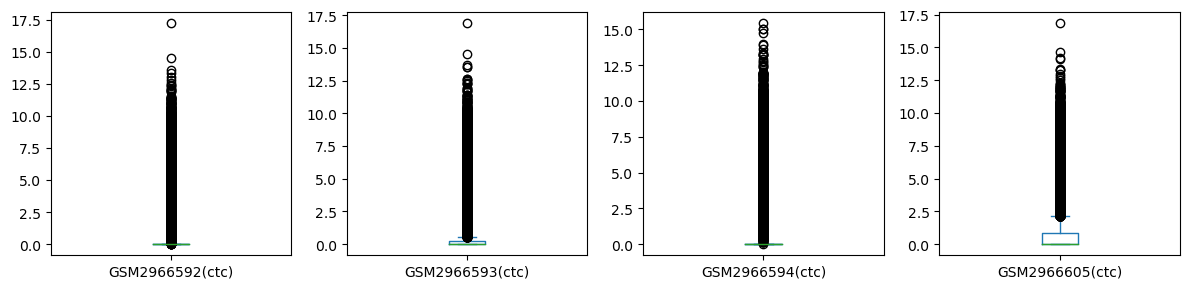

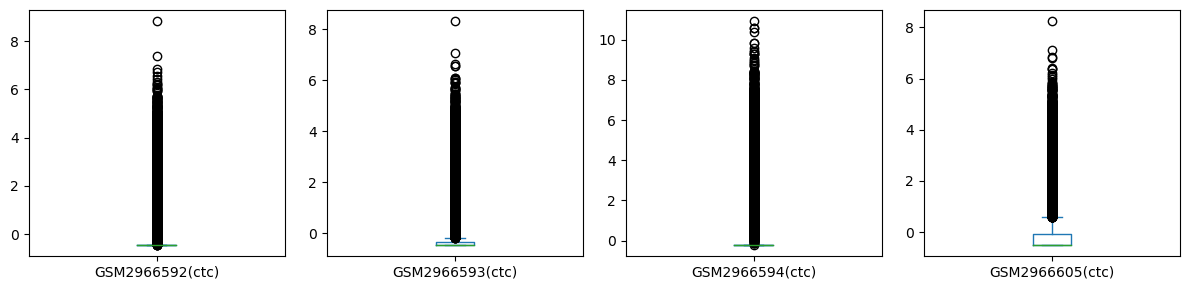

In [10]:
# 파일 로드하기
ctc_ctcr3=pd.read_table("./data/ctcr/BR_GSE109761_gene_FPKM_mat.txt", index_col=0)

# column 이름 변경
#### log scale로 변경
ctc_ctcr3.columns=[col+'(ctc)' for col in ctc_ctcr3.columns]
ctc_ctcr3=ctc_ctcr3.applymap(lambda x: np.log2(x+1))
#### gene symbol 별 평균 expression 구하기
ctc_ctcr3=get_mean_exp_ctc(ctc_ctcr3)
ctc_ctcr3
## boxplot of some cols
draw_boxplots(ctc_ctcr3, num_of_col=4)

# #### z-score normalization
ctc_ctcr_norm3=z_score_norm(ctc_ctcr3)
ctc_ctcr_norm3

## boxplot of some cols
draw_boxplots(ctc_ctcr_norm3, num_of_col=4)

### ctc data from ctcrbase 4

,GSM1953978(ctc),GSM1953983(ctc),GSM1953982(ctc),GSM1953981(ctc),GSM1953980(ctc),GSM1953979(ctc),GSM1953977(ctc),GSM1953976(ctc),GSM1953975(ctc),GSM1953974(ctc),...,GSM2188714(ctc),GSM2188712(ctc),GSM2188715(ctc),GSM2188716(ctc),GSM2188717(ctc),GSM2188718(ctc),GSM2188719(ctc),GSM2188720(ctc),GSM2188721(ctc),GSM2188722(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5S,0.0,0.0,0.000000,0.278971,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7SK,0.0,0.0,0.720190,0.456478,0.0,0.422028,0.437150,0.452617,0.390479,0.566738,...,0.496255,0.793557,0.666761,0.000000,0.000000,0.152913,0.567878,1.866179,1.913085,2.982643
A1BG,0.0,0.0,3.129283,0.000000,0.0,4.480265,0.000000,4.322649,0.367371,0.000000,...,0.163499,0.000000,0.000000,2.367371,0.000000,3.072106,0.189034,1.124328,0.000000,0.000000
A1BG-AS1,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.475085,0.000000,0.000000,4.247928,...,0.000000,0.000000,1.819668,0.000000,0.000000,1.604071,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.509062,0.000000,0.000000,0.000000,0.000000
snoZ40,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
snoZ6,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,GSM1953978(ctc),GSM1953983(ctc),GSM1953982(ctc),GSM1953981(ctc),GSM1953980(ctc),GSM1953979(ctc),GSM1953977(ctc),GSM1953976(ctc),GSM1953975(ctc),GSM1953974(ctc),...,GSM2188714(ctc),GSM2188712(ctc),GSM2188715(ctc),GSM2188716(ctc),GSM2188717(ctc),GSM2188718(ctc),GSM2188719(ctc),GSM2188720(ctc),GSM2188721(ctc),GSM2188722(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,-0.483811,-0.516784,-0.399395,-0.416059,-0.345781
5S,-0.346213,-0.377418,-0.442845,-0.346070,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,-0.483811,-0.516784,-0.399395,-0.416059,-0.345781
7SK,-0.346213,-0.377418,-0.069577,-0.258757,-0.510386,-0.196329,-0.176765,-0.095285,-0.234633,-0.091423,...,-0.229036,0.481973,-0.010570,-0.478619,-0.319068,-0.407537,-0.232543,0.816938,0.794401,1.879002
A1BG,-0.346213,-0.377418,1.179035,-0.483291,-0.510386,1.915233,-0.419366,2.007117,-0.246410,-0.393154,...,-0.394809,-0.269531,-0.421295,0.737242,-0.319068,1.048571,-0.422167,0.333416,-0.416059,-0.345781
A1BG-AS1,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,0.954213,-0.341171,-0.433634,1.868445,...,-0.476261,-0.269531,0.699623,-0.478619,-0.319068,0.316308,-0.516784,-0.399395,-0.416059,-0.345781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ278,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,2.264137,-0.516784,-0.399395,-0.416059,-0.345781
snoZ40,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,-0.483811,-0.516784,-0.399395,-0.416059,-0.345781
snoZ6,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,-0.483811,-0.516784,-0.399395,-0.416059,-0.345781


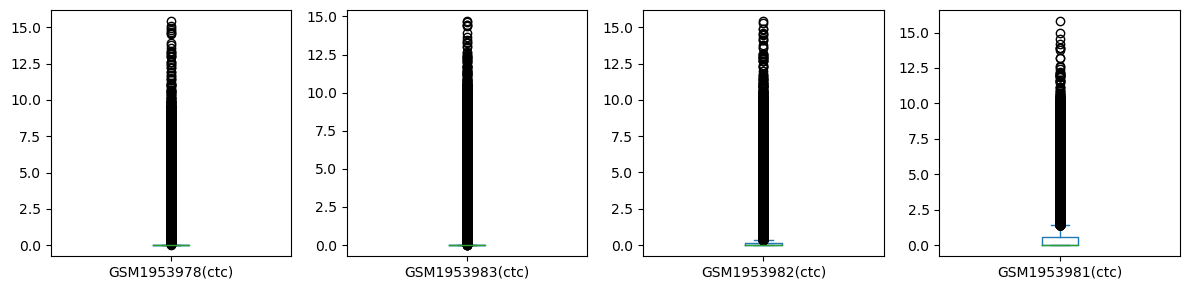

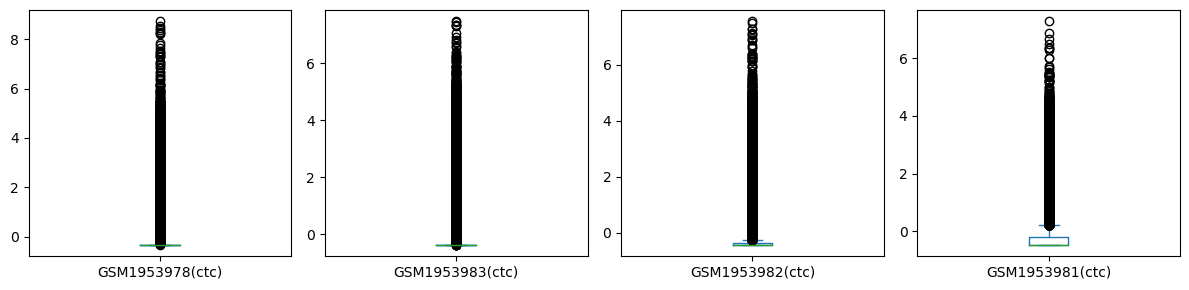

In [11]:
# 파일 로드하기
ctc_ctcr4=pd.read_table("./data/ctcr/BR_GSE75367_gene_FPKM_mat.txt", index_col=0)

#### log scale로 변경
ctc_ctcr4.columns=[col+'(ctc)' for col in ctc_ctcr4.columns]
ctc_ctcr4=ctc_ctcr4.applymap(lambda x: np.log2(x+1))
#### gene symbol 별 평균 expression 구하기
ctc_ctcr4=get_mean_exp_ctc(ctc_ctcr4)
ctc_ctcr4
## boxplot of some cols
draw_boxplots(ctc_ctcr4, num_of_col=4)

# #### z-score normalization
ctc_ctcr_norm4=z_score_norm(ctc_ctcr4)
ctc_ctcr_norm4

## boxplot of some cols
draw_boxplots(ctc_ctcr_norm4, num_of_col=4)

## ccle

### prm data from ccle

In [12]:
def get_specific_cancer(exp, cancer):
    sam_info=pd.read_table("./data/ccle/sample_info_22Q1.csv",sep=',', index_col=0)

    exp_prm_ids=sam_info.loc[(sam_info['primary_disease']==cancer)&(sam_info['primary_or_metastasis']=='Primary')].index
    exp_prm_ids=set(exp_prm_ids)&set(exp.index)
    exp_prm=exp.loc[exp_prm_ids]
    exp_prm.index=exp_prm.index+'(prm)'
    
    exp_met_ids=sam_info.loc[(sam_info['primary_disease']==cancer)&(sam_info['primary_or_metastasis']=='Metastasis')].index
    exp_met_ids=set(exp_met_ids)&set(exp.index)
    exp_met=exp.loc[exp_met_ids]
    
    met_site=sam_info.loc[exp_met_ids,'sample_collection_site']
    exp_met.index=exp_met.index+'('+met_site+')'
    
    ccle_exp=pd.concat([exp_prm,exp_met]).T
    
    return ccle_exp
    
def get_mean_exp_ccle(exp):
    split_ind=pd.Series(exp.index).str.split('(')
    exp.index=[val[0] for val in split_ind]
    exp.index.name='gene'
    
    exp=exp.reset_index()
    exp_mean=exp.groupby('gene').mean()
    
    return exp_mean
    

/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3378818752.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  exp_prm=exp.loc[exp_prm_ids]
/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3378818752.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  exp_met=exp.loc[exp_met_ids]
/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3378818752.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  met_site=sam_info.loc[exp_met_ids,'sample_collection_site']


,ACH-000725(prm),ACH-000554(prm),ACH-000349(prm),ACH-001391(prm),ACH-000668(prm),ACH-001390(prm),ACH-000755(prm),ACH-000818(prm),ACH-000643(prm),ACH-001419(prm),...,ACH-000044(pleural_effusion),ACH-000147(pleural_effusion),ACH-000768(pleural_effusion),ACH-001392(pleural_effusion),ACH-001820(pleural_effusion),ACH-000248(pleural_effusion),ACH-001396(pleural_effusion),ACH-000828(ascites),ACH-000902(pleural_effusion),ACH-000621(pleural_effusion)
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,4.621759,0.000000,5.916715,2.678072,0.782409,2.731183,2.910733,5.221877,4.100978,1.521051,...,5.710118,4.515384,3.384050,5.000901,0.731183,2.518535,5.155425,5.072106,4.579542,4.914565
A1CF,0.028569,0.028569,0.056584,0.000000,0.014355,0.014355,0.014355,0.056584,0.028569,0.000000,...,0.056584,0.000000,0.084064,0.000000,0.000000,0.014355,0.000000,0.000000,0.028569,0.028569
A2M,0.070389,0.201634,0.111031,0.201634,0.014355,0.275007,0.163499,0.214125,0.056584,0.176323,...,0.505891,0.150560,0.464668,0.000000,5.454176,1.275007,0.176323,0.847997,0.201634,0.163499
A2ML1,0.097611,1.843984,0.137504,0.000000,4.872336,1.416840,0.137504,0.985500,1.695994,0.321928,...,0.411426,0.124328,0.000000,0.070389,0.678072,2.451541,0.250962,0.765535,3.798051,0.000000
A3GALT2,0.000000,0.124328,0.056584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.084064,0.000000,0.000000,0.028569,0.000000,0.000000,0.000000,0.028569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2.611172,0.111031,3.755956,0.014355,1.883621,1.111031,2.235727,2.739848,1.594549,0.555816,...,1.084064,2.490570,1.744161,1.070389,2.695994,0.014355,0.298658,1.608809,1.613532,1.985500
ZYG11B,2.480265,1.974529,3.106013,3.454176,2.797013,1.695994,1.970854,2.446256,1.735522,1.516015,...,2.469886,2.443607,2.643856,1.570463,3.452859,2.794936,2.014355,2.720278,3.049631,3.310340
ZYX,6.193772,6.539314,4.430285,6.061560,7.119356,5.025029,6.416502,5.735251,6.321207,5.984134,...,4.039138,3.613532,6.563311,4.240314,6.238787,7.776828,2.924100,5.705149,5.112283,6.275007


,ACH-000725(prm),ACH-000554(prm),ACH-000349(prm),ACH-001391(prm),ACH-000668(prm),ACH-001390(prm),ACH-000755(prm),ACH-000818(prm),ACH-000643(prm),ACH-001419(prm),...,ACH-000044(pleural_effusion),ACH-000147(pleural_effusion),ACH-000768(pleural_effusion),ACH-001392(pleural_effusion),ACH-001820(pleural_effusion),ACH-000248(pleural_effusion),ACH-001396(pleural_effusion),ACH-000828(ascites),ACH-000902(pleural_effusion),ACH-000621(pleural_effusion)
A1BG,0.746457,-1.041394,1.177000,0.126475,-0.791329,0.239602,0.233429,0.955383,0.705931,-0.340281,...,1.149795,0.728084,0.258245,1.338228,-0.749710,-0.063322,1.241958,1.011915,0.751302,0.832658
A1CF,-1.053083,-1.030138,-1.089470,-0.982497,-1.085649,-0.942041,-0.966577,-1.107115,-1.076930,-0.975524,...,-1.082303,-1.076133,-1.024723,-0.920600,-1.035502,-1.030063,-0.951913,-1.022272,-1.030134,-1.121159
A2M,-1.036699,-0.961953,-1.068412,-0.899002,-1.085649,-0.828675,-0.904785,-1.044209,-1.064666,-0.901885,...,-0.904910,-1.015974,-0.876752,-0.920600,1.096326,-0.543387,-0.876880,-0.682180,-0.962390,-1.067204
A2ML1,-1.026034,-0.314891,-1.058174,-0.982497,0.775943,-0.332052,-0.915555,-0.736199,-0.346948,-0.841076,...,-0.942206,-1.026455,-1.057406,-0.888807,-0.770470,-0.089185,-0.845117,-0.715252,0.445395,-1.132584
A3GALT2,-1.064276,-0.992411,-1.089470,-0.982497,-1.091150,-0.948285,-0.972525,-1.129709,-1.089438,-0.975524,...,-1.104643,-1.076133,-1.024723,-0.920600,-1.035502,-1.024575,-0.951913,-1.022272,-1.041318,-1.121159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.041259,-0.997649,0.341302,-0.976553,-0.369341,-0.465059,-0.046234,-0.035690,-0.391360,-0.743396,...,-0.676639,-0.080973,-0.379311,-0.437122,0.018259,-1.030063,-0.824820,-0.377053,-0.409715,-0.338619
ZYG11B,-0.092547,-0.263458,0.089930,0.447855,-0.019327,-0.210638,-0.155975,-0.152921,-0.329643,-0.342384,...,-0.129496,-0.099739,-0.029527,-0.211247,0.314088,0.043383,-0.094712,0.068706,0.152433,0.191159
ZYX,1.362347,1.535000,0.602107,1.527556,1.637007,1.237276,1.685914,1.160372,1.677926,1.523657,...,0.490068,0.367730,1.494278,0.994683,1.403001,1.966647,0.292426,1.265800,0.959839,1.376674
ZZEF1,0.521965,0.579278,0.446054,-0.004504,0.078811,-0.118912,0.172392,0.195004,0.585455,0.003757,...,0.224844,0.351490,0.255012,-0.130848,0.171269,0.437006,0.246244,0.232077,0.349132,0.537768


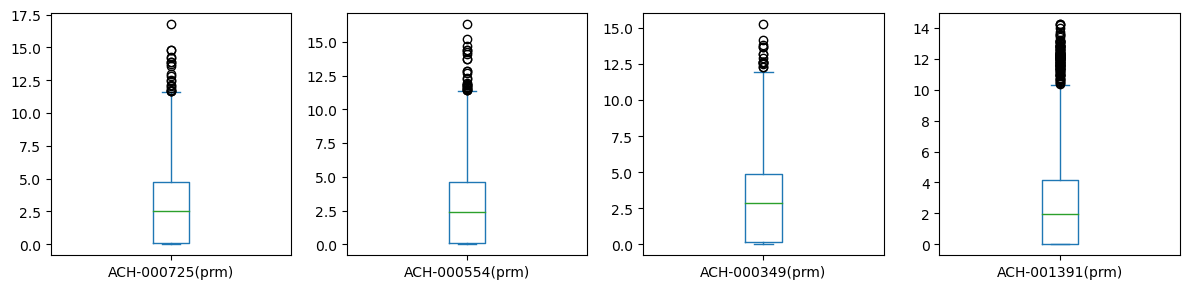

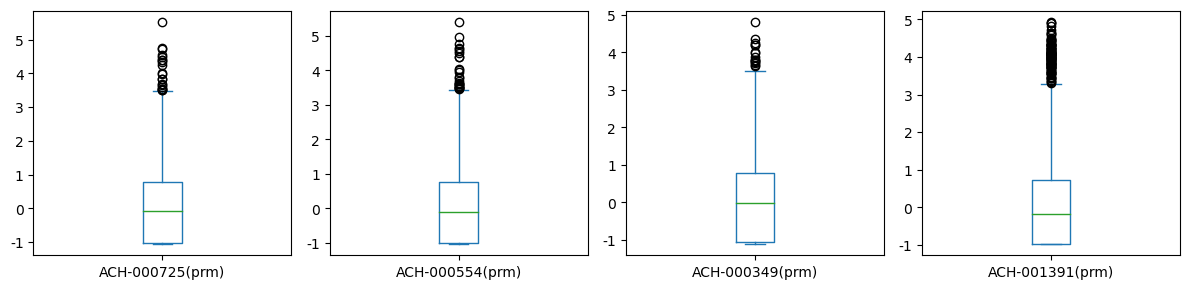

In [13]:
# 파일 로드하기
prmMet_ccle=pd.read_table("./data/ccle/CCLE_expression_22Q1.csv",sep=',', index_col=0)

#### breast cancer의 primary, metastasis 가져오기 (metastasis경우  target tissue 정보 포함)
prmMet_ccle=get_specific_cancer(prmMet_ccle, 'Breast Cancer')
# gene symbol별로 expression 평균 구하기
prmMet_ccle=get_mean_exp_ccle(prmMet_ccle)
prmMet_ccle
## boxplot of some cols
draw_boxplots(prmMet_ccle, num_of_col=4)

# #### z-score normalization
prmMet_ccle_norm=z_score_norm(prmMet_ccle)
prmMet_ccle_norm.index=[x.strip() for x in prmMet_ccle_norm.index]
prmMet_ccle_norm
## boxplot of some cols
draw_boxplots(prmMet_ccle_norm, num_of_col=4)

# merge three kinds of data from geo, ctcr, ccle

## check three data

In [14]:
print('######## geo')
met_geo_norm.head()
met_geo_norm2.head()
met_geo_norm3.head()

print('######## ctcr')
ctc_ctcr_norm.head()
ctc_ctcr_norm2.head()
ctc_ctcr_norm3.head()
ctc_ctcr_norm4.head()

print('######## ccle')
prmMet_ccle_norm.head()

######## geo


,GSM352095(Lung),GSM352097(Brain),GSM352098(Brain),GSM352100(Bone),GSM352101(Brain),GSM352103(Bone),GSM352105(Bone),GSM352107(Brain),GSM352109(Bone),GSM352110(Brain),...,GSM352123(Bone),GSM352124(Bone),GSM352125(Brain),GSM352126(Bone),GSM352127(Lung),GSM352128(Brain),GSM352129(Brain),GSM352130(Brain),GSM352131(Bone),GSM352132(Lung)
ID_REF,,,,,,,,,,,,,,,,,,,,,
A1BG,0.501337,-0.230881,0.241228,0.063233,0.107921,0.114509,0.297598,-0.192703,0.047929,-0.199870,...,-0.007201,-0.155640,0.197238,0.437543,0.037334,0.096004,-0.150683,0.054240,-0.163646,-0.179071
A1BG-AS1,-0.214389,-0.589908,-0.251818,-0.506116,-0.376887,0.040652,-0.581868,-0.613532,-0.533221,-0.574429,...,-0.360288,-0.414578,-0.416911,-0.462535,-0.637676,-0.492913,-0.431020,-0.379478,-0.674672,-0.544890
A1CF,-1.071189,0.729485,-1.065379,-1.070928,-1.025721,-1.057427,-0.994505,-1.084076,-1.096450,-1.085834,...,-1.080351,-1.019164,-1.029516,-1.037872,-0.954620,-0.997201,-0.828404,-0.985400,-1.009219,-1.066749
A2M,1.035578,0.989834,0.897488,1.160587,0.809763,0.741324,1.359989,1.237421,1.079125,1.181069,...,0.965793,1.037881,0.873429,1.158111,1.556118,0.479234,0.827775,0.736910,0.701986,1.037905
A2M-AS1,-0.073981,-0.775011,-0.716298,-0.032413,-0.520600,-0.292840,0.315808,0.099028,-0.227172,-0.648803,...,-0.273300,-0.130309,-0.200993,0.124868,0.022187,-0.944047,-0.729592,-0.470648,-0.588322,-0.439237


,GSM1124867(liver),GSM1124868(liver),GSM1124869(breast),GSM1124870(breast),GSM1124871(lymph node),GSM1124872(skin local-regional),GSM1124873(skin local-regional),GSM1124874(lymph node),GSM1124875(lymph node),GSM1124876(skin local-regional),...,GSM1124948(lymph node),GSM1124949(lymph node),GSM1124950(lymph node),GSM1124951(liver),GSM1124952(liver),GSM1124953(bone),GSM1124954(lymph node),GSM1124955(lymph node),GSM1124956(lymph node),GSM1124957(liver)
ID_REF,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.149419,-0.129499,-0.415085,-0.543600,-0.056093,-0.744037,-0.210760,-0.130492,0.048855,-0.478649,...,-0.327627,-0.527089,-0.269504,-0.326069,0.503214,-0.660611,-0.538428,0.291922,-0.205049,0.077838
A1CF,-1.422855,-0.994238,-1.700409,-1.620281,-1.480629,-1.623401,-1.674227,-1.614651,-1.509212,-1.517021,...,-1.632053,-1.737870,-1.765470,-1.531297,-0.306879,-1.556401,-1.569727,-1.559568,-1.370040,-0.748787
A2LD1,-0.227410,-0.402507,-0.714739,-0.766140,-0.054833,-0.247005,-0.871433,-0.263346,-0.835073,-0.734703,...,-0.837048,-0.152963,-0.602789,-0.616145,-0.327355,0.035281,-0.638936,-0.803963,-0.370545,-0.465520
A2M,2.025395,0.822856,1.861008,1.567310,0.737416,1.343497,1.218138,0.708380,1.503308,1.976387,...,1.632870,2.040538,1.142506,1.056285,1.662684,0.388850,2.433109,2.139530,1.444705,1.101463
A4GALT,-0.333530,-0.171403,-0.522196,-0.663232,-0.554869,-0.552871,-0.479638,-0.331670,-0.680290,-0.524970,...,-0.601634,-0.038932,-0.765615,-0.572506,-0.583309,-0.585650,-0.171356,-0.084586,-0.169864,-0.509298


,GSM352133(Lung),GSM352134(Lung),GSM352135(Lung),GSM352136(Liver),GSM352137(Brain),GSM352138(Lung),GSM352139(Liver),GSM352140(Brain),GSM352141(Lung),GSM352142(Brain),...,GSM352159(Bone),GSM352160(Lung),GSM352161(Lung),GSM352162(Liver),GSM352163(Bone),GSM352164(Lung),GSM352165(Lung),GSM352166(Lung),GSM352167(Bone),GSM352168(Lung)
ID_REF,,,,,,,,,,,,,,,,,,,,,
A1CF,-0.228329,-0.117833,0.032204,-0.104194,0.182697,-0.005778,1.608631,1.343936,0.082118,-0.074600,...,0.178943,0.253736,0.201002,1.559008,0.224953,-0.068701,0.049027,0.116386,0.104314,0.551069
A2M,1.684554,2.003434,3.059468,1.605659,1.665565,1.591413,2.836375,2.124112,2.692838,2.143758,...,1.740573,2.328760,3.276907,2.148337,1.822639,2.260213,2.330824,3.229663,2.487768,2.880478
A4GALT,-0.294134,-0.439350,-0.228342,-0.323674,-0.297631,-0.518447,-0.555560,-0.437233,-0.353822,-0.429987,...,-0.424463,-0.490139,-0.437754,-0.583191,-0.263710,-0.470352,-0.458165,-0.558441,-0.380812,-0.335907
A4GNT,-0.330755,-0.128776,-0.029878,-0.182330,-0.149489,-0.134499,-0.183776,-0.168533,-0.089071,-0.200429,...,-0.089351,-0.213817,-0.138726,-0.183132,-0.016107,-0.209264,-0.175635,-0.120496,-0.099934,-0.070760
AAAS,1.047112,0.909456,1.008928,0.916118,0.743155,0.814687,0.673071,0.936026,0.831794,0.839916,...,0.909906,0.771768,0.724625,0.855815,0.775594,0.652411,0.600137,0.652146,0.833852,0.709364


######## ctcr


,GSM3021472(ctc),GSM3021473(ctc),GSM3021474(ctc),GSM3021475(ctc),GSM3021476(ctc),GSM3021477(ctc),GSM3021478(ctc),GSM3021479(ctc),GSM3021480(ctc),GSM3021481(ctc),...,GSM3021531(ctc),GSM3021538(ctc),GSM3021539(ctc),GSM3021540(ctc),GSM3021541(ctc),GSM3021542(ctc),GSM3021543(ctc),GSM3021544(ctc),GSM3021545(ctc),GSM3021546(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543
5S,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,-0.472103,-0.526862,-0.543531,-0.480769,-0.479110,-0.516055,-0.498823,-0.446469,-0.505695,-0.531543
7SK,0.118861,0.065009,0.334719,-0.305165,-0.222206,0.110538,0.161217,-0.080431,0.026181,0.326390,...,-0.117390,0.005907,-0.161652,-0.132348,-0.006763,-0.136874,-0.040826,-0.034281,-0.084925,-0.223309
A1BG,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,-0.508048,-0.494224,-0.410825,-0.236591,...,0.894002,2.103294,2.057920,1.858321,1.413712,1.800410,1.052422,1.849402,0.969598,1.655915
A1BG-AS1,-0.456772,-0.468810,-0.222903,-0.305165,-0.388957,-0.409321,0.131102,-0.494224,-0.410825,-0.236591,...,1.471140,-0.526862,-0.543531,-0.044023,-0.479110,1.352526,-0.498823,-0.446469,1.429770,0.917099


,GSM2314585(ctc),GSM2314587(ctc),GSM2314589(ctc),GSM2314591(ctc),GSM2314592(ctc),GSM2314594(ctc),GSM2314596(ctc),GSM2314598(ctc),GSM2314600(ctc),GSM2314602(ctc),...,GSM2314704(ctc),GSM2314717(ctc),GSM2314706(ctc),GSM2314719(ctc),GSM2314708(ctc),GSM2314710(ctc),GSM2314711(ctc),GSM2314713(ctc),GSM2314715(ctc),GSM2314720(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635
5S,-0.232107,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,-0.220567,-0.319354,-0.191635
7SK,-0.012255,-0.193402,-0.272256,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.257168,-0.287137,-0.035129,-0.159826,-0.245089,-0.224081,-0.220567,-0.172729,-0.191635
A1BG,-0.232107,-0.193402,-0.272256,-0.162954,-0.262952,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.115892,0.064728,-0.291819,-0.241824,-0.075511,-0.245089,0.303652,-0.148539,-0.319354,-0.191635
A1BG-AS1,-0.232107,-0.124043,-0.090463,-0.162954,-0.334583,-0.182606,-0.161402,-0.179149,-0.209292,-0.283649,...,-0.225717,-0.119999,-0.310185,-0.241824,-0.159826,-0.245089,-0.224081,0.264047,-0.319354,-0.191635


,GSM2966592(ctc),GSM2966593(ctc),GSM2966594(ctc),GSM2966605(ctc),GSM2966606(ctc),GSM2966607(ctc),GSM2966611(ctc),GSM2966637(ctc),GSM2966638(ctc),GSM2966639(ctc),...,GSM2966724(ctc),GSM2966725(ctc),GSM2966726(ctc),GSM2966730(ctc),GSM2966731(ctc),GSM2966732(ctc),GSM2966733(ctc),GSM2966734(ctc),GSM2966735(ctc),GSM2966738(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803
5S,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,-0.481239,-0.478921,-0.515663,-0.252215,-0.499109,-0.445865,-0.505810,-0.531357,-0.287803
7SK,0.106714,0.069754,-0.221911,0.020998,-0.080134,0.021167,-0.236209,-0.166506,0.121519,-0.099028,...,-0.139013,-0.155517,-0.054178,-0.161901,-0.252215,-0.041117,-0.046730,-0.100819,-0.113948,-0.287803
A1BG,-0.456779,-0.468661,-0.221911,-0.507748,-0.494326,-0.411092,-0.236209,1.269231,-0.435391,-0.421311,...,1.888560,2.012315,1.713225,1.860074,-0.252215,1.065863,1.972829,0.964667,1.682097,1.159955
A1BG-AS1,-0.456779,-0.468661,-0.221911,0.156494,-0.494326,-0.411092,-0.236209,-0.391170,-0.435391,-0.421311,...,-0.543208,0.193640,-0.478921,1.359382,-0.252215,-0.499109,-0.445865,1.424014,0.874704,-0.287803


,GSM1953978(ctc),GSM1953983(ctc),GSM1953982(ctc),GSM1953981(ctc),GSM1953980(ctc),GSM1953979(ctc),GSM1953977(ctc),GSM1953976(ctc),GSM1953975(ctc),GSM1953974(ctc),...,GSM2188714(ctc),GSM2188712(ctc),GSM2188715(ctc),GSM2188716(ctc),GSM2188717(ctc),GSM2188718(ctc),GSM2188719(ctc),GSM2188720(ctc),GSM2188721(ctc),GSM2188722(ctc)
gene,,,,,,,,,,,,,,,,,,,,,
5,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,-0.483811,-0.516784,-0.399395,-0.416059,-0.345781
5S,-0.346213,-0.377418,-0.442845,-0.346070,-0.510386,-0.415917,-0.419366,-0.341171,-0.433634,-0.393154,...,-0.476261,-0.269531,-0.421295,-0.478619,-0.319068,-0.483811,-0.516784,-0.399395,-0.416059,-0.345781
7SK,-0.346213,-0.377418,-0.069577,-0.258757,-0.510386,-0.196329,-0.176765,-0.095285,-0.234633,-0.091423,...,-0.229036,0.481973,-0.010570,-0.478619,-0.319068,-0.407537,-0.232543,0.816938,0.794401,1.879002
A1BG,-0.346213,-0.377418,1.179035,-0.483291,-0.510386,1.915233,-0.419366,2.007117,-0.246410,-0.393154,...,-0.394809,-0.269531,-0.421295,0.737242,-0.319068,1.048571,-0.422167,0.333416,-0.416059,-0.345781
A1BG-AS1,-0.346213,-0.377418,-0.442845,-0.483291,-0.510386,-0.415917,0.954213,-0.341171,-0.433634,1.868445,...,-0.476261,-0.269531,0.699623,-0.478619,-0.319068,0.316308,-0.516784,-0.399395,-0.416059,-0.345781


######## ccle


,ACH-000725(prm),ACH-000554(prm),ACH-000349(prm),ACH-001391(prm),ACH-000668(prm),ACH-001390(prm),ACH-000755(prm),ACH-000818(prm),ACH-000643(prm),ACH-001419(prm),...,ACH-000044(pleural_effusion),ACH-000147(pleural_effusion),ACH-000768(pleural_effusion),ACH-001392(pleural_effusion),ACH-001820(pleural_effusion),ACH-000248(pleural_effusion),ACH-001396(pleural_effusion),ACH-000828(ascites),ACH-000902(pleural_effusion),ACH-000621(pleural_effusion)
A1BG,0.746457,-1.041394,1.177000,0.126475,-0.791329,0.239602,0.233429,0.955383,0.705931,-0.340281,...,1.149795,0.728084,0.258245,1.338228,-0.749710,-0.063322,1.241958,1.011915,0.751302,0.832658
A1CF,-1.053083,-1.030138,-1.089470,-0.982497,-1.085649,-0.942041,-0.966577,-1.107115,-1.076930,-0.975524,...,-1.082303,-1.076133,-1.024723,-0.920600,-1.035502,-1.030063,-0.951913,-1.022272,-1.030134,-1.121159
A2M,-1.036699,-0.961953,-1.068412,-0.899002,-1.085649,-0.828675,-0.904785,-1.044209,-1.064666,-0.901885,...,-0.904910,-1.015974,-0.876752,-0.920600,1.096326,-0.543387,-0.876880,-0.682180,-0.962390,-1.067204
A2ML1,-1.026034,-0.314891,-1.058174,-0.982497,0.775943,-0.332052,-0.915555,-0.736199,-0.346948,-0.841076,...,-0.942206,-1.026455,-1.057406,-0.888807,-0.770470,-0.089185,-0.845117,-0.715252,0.445395,-1.132584
A3GALT2,-1.064276,-0.992411,-1.089470,-0.982497,-1.091150,-0.948285,-0.972525,-1.129709,-1.089438,-0.975524,...,-1.104643,-1.076133,-1.024723,-0.920600,-1.035502,-1.024575,-0.951913,-1.022272,-1.041318,-1.121159


## merge

,GSM352095(Lung),GSM352097(Brain),GSM352098(Brain),GSM352100(Bone),GSM352101(Brain),GSM352103(Bone),GSM352105(Bone),GSM352107(Brain),GSM352109(Bone),GSM352110(Brain),...,ACH-000044(pleural_effusion),ACH-000147(pleural_effusion),ACH-000768(pleural_effusion),ACH-001392(pleural_effusion),ACH-001820(pleural_effusion),ACH-000248(pleural_effusion),ACH-001396(pleural_effusion),ACH-000828(ascites),ACH-000902(pleural_effusion),ACH-000621(pleural_effusion)
A1CF,-1.071189,0.729485,-1.065379,-1.070928,-1.025721,-1.057427,-0.994505,-1.084076,-1.096450,-1.085834,...,-1.082303,-1.076133,-1.024723,-0.920600,-1.035502,-1.030063,-0.951913,-1.022272,-1.030134,-1.121159
A2M,1.035578,0.989834,0.897488,1.160587,0.809763,0.741324,1.359989,1.237421,1.079125,1.181069,...,-0.904910,-1.015974,-0.876752,-0.920600,1.096326,-0.543387,-0.876880,-0.682180,-0.962390,-1.067204
A4GALT,0.067409,-0.125885,-0.109271,0.167555,-0.161992,0.404922,0.197682,-0.112918,-0.059365,-0.112746,...,-0.471332,0.118966,0.358355,-0.720230,-1.029891,-0.675198,-0.939756,-0.410237,-1.030134,0.090380
AAAS,0.588323,0.954485,0.778330,0.655084,0.774810,0.683286,0.666803,0.632483,0.827251,0.502400,...,1.473426,1.415177,0.948649,1.020373,0.768211,1.285295,1.140884,1.119724,1.194503,1.043947
AADAC,-0.960143,-0.920422,-0.954046,-0.989069,-0.865830,-0.955777,-0.992850,-0.917418,-0.898866,-0.811236,...,-1.104643,-1.053524,-0.959837,-0.901339,-1.035502,-0.938721,-0.939756,-0.911980,-1.030134,-1.104436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,1.040347,2.585069,2.162148,1.973435,2.397268,2.314191,1.869014,1.614342,1.587678,2.286879,...,1.684727,2.036522,1.842034,1.125730,1.547513,1.811100,1.311584,1.447439,1.633652,1.393197
ZXDB,-0.366391,-0.691614,-0.662469,-0.635454,-0.657131,-0.826993,-0.859489,-0.754174,-0.664924,-0.699778,...,-0.245399,-0.325057,-0.086136,-0.256676,-0.281221,-0.244343,-0.302501,-0.231854,-0.233578,-0.659647
ZXDC,0.015824,-0.117151,0.291449,0.111013,0.280946,0.367940,0.003261,0.226536,0.043818,0.078818,...,0.594552,0.443939,0.176864,0.319866,0.245155,0.304451,0.650947,0.556437,0.361512,0.099314
ZZEF1,0.205727,0.128729,0.103956,0.174408,0.133196,0.253913,0.142190,0.200429,0.115225,0.050615,...,0.224844,0.351490,0.255012,-0.130848,0.171269,0.437006,0.246244,0.232077,0.349132,0.537768


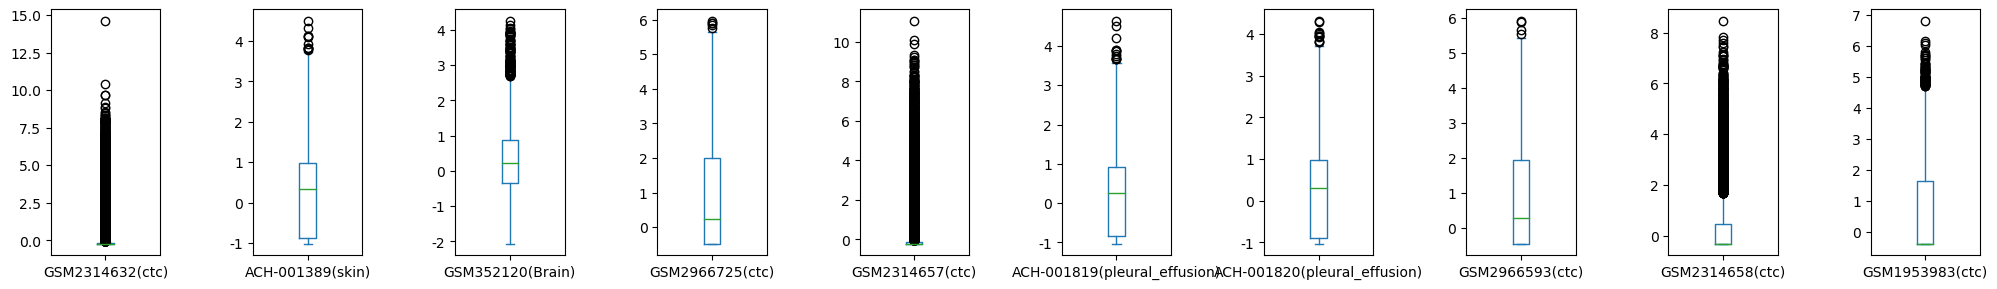

In [16]:
mer_exp=pd.concat([met_geo_norm, met_geo_norm2, met_geo_norm3, 
                   ctc_ctcr_norm, ctc_ctcr_norm2, ctc_ctcr_norm3, ctc_ctcr_norm4,
                   prmMet_ccle_norm], join='inner', axis='columns')
mer_exp
draw_boxplots(mer_exp, num_of_col=10, ran_col=True)

## quantile norm

In [17]:
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values,axis=0), 
                             index=df.index, 
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [19]:
# quantile_normalize(df)
mer_exp_qtNorm=quantile_normalize(mer_exp)
mer_exp_qtNorm

,GSM352095(Lung),GSM352097(Brain),GSM352098(Brain),GSM352100(Bone),GSM352101(Brain),GSM352103(Bone),GSM352105(Bone),GSM352107(Brain),GSM352109(Bone),GSM352110(Brain),...,ACH-000044(pleural_effusion),ACH-000147(pleural_effusion),ACH-000768(pleural_effusion),ACH-001392(pleural_effusion),ACH-001820(pleural_effusion),ACH-000248(pleural_effusion),ACH-001396(pleural_effusion),ACH-000828(ascites),ACH-000902(pleural_effusion),ACH-000621(pleural_effusion)
A1CF,-0.762161,0.815680,-0.748810,-0.772205,-0.741059,-0.754223,-0.739378,-0.763837,-0.772407,-0.767996,...,-0.654817,-0.976115,-0.616916,-0.976115,-0.976115,-0.725799,-0.976115,-0.976115,-0.675132,-0.732827
A2M,1.180796,1.160821,0.967269,1.308681,0.861349,0.789796,1.627464,1.493939,1.224066,1.377852,...,-0.500010,-0.566439,-0.496467,-0.976115,1.167529,-0.370514,-0.485163,-0.405690,-0.522826,-0.624065
A4GALT,-0.137791,-0.342571,-0.308824,-0.085146,-0.346662,0.355395,-0.014038,-0.321937,-0.295380,-0.331380,...,-0.376104,-0.110981,0.096289,-0.430229,-0.630299,-0.408245,-0.589091,-0.330619,-0.675132,-0.154915
AAAS,0.599584,1.111625,0.813322,0.622287,0.810402,0.716972,0.655540,0.623102,0.886098,0.463932,...,2.014065,1.801823,0.913512,1.168159,0.663401,1.499700,1.293052,1.216474,1.336228,1.140377
AADAC,-0.729800,-0.729800,-0.719202,-0.750873,-0.694349,-0.726855,-0.739173,-0.715966,-0.716870,-0.690800,...,-0.976115,-0.625195,-0.544299,-0.589440,-0.976115,-0.525412,-0.589091,-0.499834,-0.675132,-0.678829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,1.186005,3.745774,3.138333,2.719735,3.605673,3.366399,2.572840,2.164167,2.039582,3.289438,...,2.475650,3.100588,2.702466,1.302524,2.003522,2.551955,1.569066,1.816802,2.287705,1.810479
ZXDB,-0.494892,-0.654508,-0.615568,-0.642044,-0.609100,-0.686732,-0.701282,-0.662995,-0.639445,-0.648065,...,-0.302717,-0.328965,-0.252752,-0.213082,-0.310696,-0.277303,-0.250023,-0.270466,-0.277490,-0.467478
ZXDC,-0.196995,-0.337004,0.148753,-0.154915,0.147914,0.293276,-0.227373,0.052834,-0.194362,-0.147324,...,0.480005,0.239872,-0.087366,0.347095,0.000533,0.048971,0.665465,0.394025,0.152843,-0.145738
ZZEF1,0.046822,-0.062373,-0.104008,-0.074523,-0.060281,0.123035,-0.083631,0.014979,-0.115231,-0.185048,...,0.007271,0.126488,-0.008841,-0.128488,-0.075218,0.209005,0.180346,0.003329,0.131993,0.375023


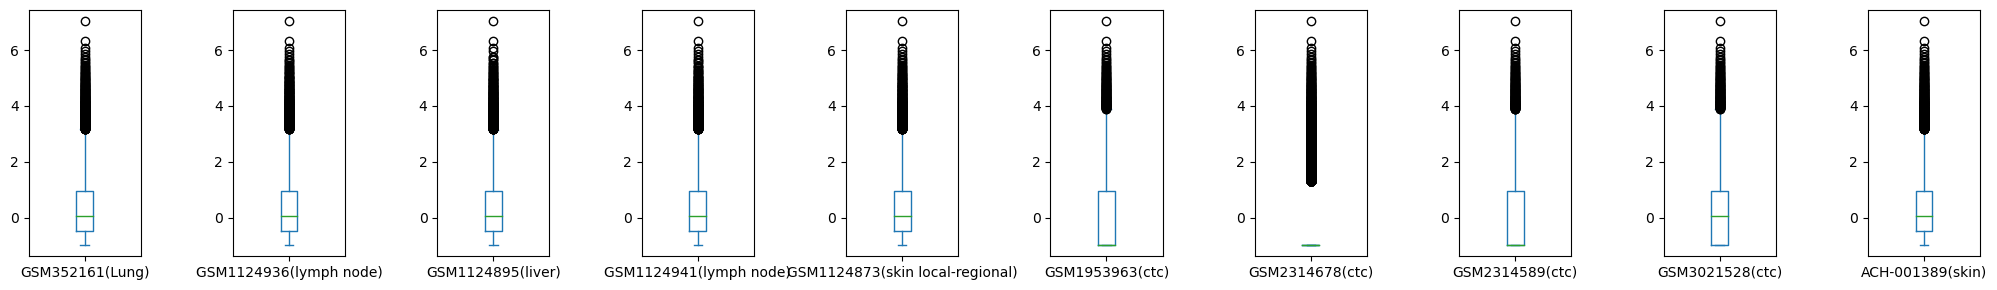

In [20]:
draw_boxplots(mer_exp_qtNorm, num_of_col=10, ran_col=True)

# PCA

## PCA 진행


In [24]:
pca_model=PCA(n_components=0.7, random_state=2020)
pca_model.fit(mer_exp_qtNorm.T.values)
mer_exp_pca=pca_model.transform(mer_exp_qtNorm.T.values)
mer_exp_pca=pd.DataFrame(data=mer_exp_pca, index=mer_exp_qtNorm.T.index, columns=['pca_{}'.format(x) for x in range(mer_exp_pca.shape[1])])
mer_exp_pca

PCA(n_components=0.7, random_state=2020)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59
GSM352095(Lung),-28.150528,3.253752,38.453725,0.588526,-0.390641,0.110821,6.599275,-20.633990,14.345296,-15.182757,...,3.177486,-2.752180,1.993956,-2.259019,2.010595,1.002164,2.895003,1.532487,-2.506051,2.667427
GSM352097(Brain),-26.842402,4.139521,42.863831,0.947708,0.989828,-4.810706,5.298568,-20.459387,16.234951,-14.468933,...,5.856796,1.428396,-0.532824,-4.322230,-1.476458,-0.116561,1.617759,-0.487162,-1.096093,-2.191144
GSM352098(Brain),-29.712101,-0.027494,37.028732,0.210543,5.952633,3.138591,2.957188,-24.103836,13.916650,-16.224279,...,-0.110578,-2.244527,-1.201567,0.484970,-2.957265,-1.684462,-0.017679,-0.965762,-1.078973,-2.591676
GSM352100(Bone),-26.358055,8.144138,47.869513,0.489725,3.806026,8.301494,7.317130,-19.456005,20.485817,-16.853108,...,-5.188968,1.278454,-0.326943,1.943351,1.287358,0.745712,-1.220863,1.214800,-0.238797,0.146541
GSM352101(Brain),-28.062230,-2.372655,35.565397,-1.525383,5.612493,-0.102849,1.796683,-24.880327,16.367740,-14.089175,...,0.897589,-1.470029,-1.820117,0.263627,0.266745,-0.057359,-0.130358,-0.891864,-0.135826,-1.480134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000248(pleural_effusion),-25.265107,-24.714976,-3.144657,-7.396330,-9.416710,-20.235983,5.904246,2.238009,-5.760695,2.804856,...,-0.275798,-2.940728,0.902695,1.410534,0.446732,-0.411573,-1.377926,1.051540,-1.794428,-0.723671
ACH-001396(pleural_effusion),-25.885976,-23.922782,-4.952890,-4.905188,-7.326839,-18.985523,0.527952,-0.941484,-2.119515,3.439225,...,-0.297058,-2.227710,-1.441086,0.867934,-0.332897,-1.342291,2.787166,1.472019,-2.128928,0.641252
ACH-000828(ascites),-24.842334,-25.098622,-2.723249,-7.397668,-6.989136,-16.028166,-1.596757,-2.287579,-2.641409,5.460811,...,-1.633623,-3.645680,-0.207483,1.633690,1.441884,-0.089060,-0.715447,2.115492,-1.834137,1.885703
ACH-000902(pleural_effusion),-25.035406,-24.690131,-1.496120,-7.364177,-9.495945,-23.008276,3.407184,-2.090206,-5.900209,3.558520,...,-0.364489,0.271591,0.099461,-0.908088,3.380425,1.449659,-1.203931,1.223863,0.550765,1.016716


# modeling

In [25]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.decomposition import PCA
#import prince

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

## original data

In [47]:
a = list(mer_exp_qtNorm.columns)
df = pd.DataFrame(a)

lst_targets = []
for i in range(189):
    lst_targets.append('met')
for j in range(266):
    lst_targets.append('ctc')
for k in range(28):
    lst_targets.append('prm')
    
int_targets = []
for i in lst_targets:
    if i == 'met':
        int_targets.append(0)
    elif i == 'ctc':
        int_targets.append(1)
    elif i == 'prm':
        int_targets.append(2)

    
targets = pd.DataFrame([lst_targets, int_targets]).T

target_df = pd.concat([df,targets], axis = 1)
target_df.columns = ['name', 'target', 'target_int']
target_df = target_df.set_index('name')


mer_exp_qtNorm1 = mer_exp_qtNorm
mer_exp_qtNorm1 = mer_exp_qtNorm1.T
mer_exp_qtNorm1 = pd.merge(mer_exp_qtNorm1, target_df, how = 'left', left_on = mer_exp_qtNorm1.index, right_on = target_df.index)

mer_exp_qtNorm1 = mer_exp_qtNorm1.astype({'target_int' : 'int'})
mer_exp_qtNorm1

,key_0,A1CF,A2M,A4GALT,AAAS,AADAC,AAGAB,AAK1,AANAT,AARSD1,...,ZSCAN18,ZSCAN2,ZWILCH,ZWINT,ZXDB,ZXDC,ZZEF1,ZZZ3,target,target_int
0,GSM352095(Lung),-0.762161,1.180796,-0.137791,0.599584,-0.729800,0.182417,-0.258430,-0.801284,0.045837,...,0.564190,-0.414918,0.440365,1.186005,-0.494892,-0.196995,0.046822,0.812887,met,0
1,GSM352097(Brain),0.815680,1.160821,-0.342571,1.111625,-0.729800,-0.058388,-0.273952,-0.835241,0.385127,...,1.099553,-0.167976,0.892148,3.745774,-0.654508,-0.337004,-0.062373,0.873747,met,0
2,GSM352098(Brain),-0.748810,0.967269,-0.308824,0.813322,-0.719202,0.492152,-0.195600,-0.826537,0.056665,...,0.838842,-0.101950,0.879677,3.138333,-0.615568,0.148753,-0.104008,0.898081,met,0
3,GSM352100(Bone),-0.772205,1.308681,-0.085146,0.622287,-0.750873,0.259798,-0.310480,-0.816698,0.026232,...,0.700339,-0.296512,0.760778,2.719735,-0.642044,-0.154915,-0.074523,1.083389,met,0
4,GSM352101(Brain),-0.741059,0.861349,-0.346662,0.810402,-0.694349,0.576679,0.022478,-0.810466,1.310174,...,0.554929,-0.292044,0.719036,3.605673,-0.609100,0.147914,-0.060281,1.235690,met,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,ACH-000248(pleural_effusion),-0.725799,-0.370514,-0.408245,1.499700,-0.525412,0.624525,0.179971,-0.593862,0.787917,...,-0.605578,-0.201572,0.422474,2.551955,-0.277303,0.048971,0.209005,0.288605,prm,2
479,ACH-001396(pleural_effusion),-0.976115,-0.485163,-0.589091,1.293052,-0.589091,1.071301,0.136295,-0.626113,2.213376,...,-0.976115,-0.303458,0.446530,1.569066,-0.250023,0.665465,0.180346,0.544229,prm,2
480,ACH-000828(ascites),-0.976115,-0.405690,-0.330619,1.216474,-0.499834,1.599212,0.048072,-0.575366,0.746927,...,-0.549054,0.095533,0.217084,1.816802,-0.270466,0.394025,0.003329,0.335907,prm,2
481,ACH-000902(pleural_effusion),-0.675132,-0.522826,-0.675132,1.336228,-0.675132,1.140920,-0.143170,-0.559953,0.951474,...,-0.399356,0.563409,0.120885,2.287705,-0.277490,0.152843,0.131993,0.235903,prm,2


In [48]:
X = mer_exp_qtNorm1.iloc[:,1:-2]
y = mer_exp_qtNorm1.loc[:, ['target']]

In [49]:
mer_exp_qtNorm1_xg = mer_exp_qtNorm1.drop(['target'], axis = 1)
Xx = mer_exp_qtNorm1_xg.iloc[:,1:-1]
yx = mer_exp_qtNorm1_xg.loc[:, ['target_int']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Xx_train, Xx_test, yx_train, yx_test = train_test_split(Xx, yx, test_size=0.2) #xgboost

### RandomForest

In [51]:
a_dic = {}
for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rn = RandomForestClassifier(oob_score=True)
    model = rn.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    a_dic["iter_{}".format(i+1)]= ["RF",model.score(X_test, y_test), metrics.precision_score(y_test, y_pred, average = 'macro'),
                 metrics.recall_score(y_test, y_pred, average = 'macro'), metrics.f1_score(y_test, y_pred, average = 'macro')]
    
df_RF = pd.DataFrame(a_dic).T
df_RF.columns = ['model',"accuracy","precision","recall","f1"]

  0%|                                                    | 0/30 [00:00<?, ?it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/1426351426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
  3%|█▍                                          | 1/30 [00:00<00:22,  1.31it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/1426351426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
  7%|██▉                                         | 2/30 [00:01<00:20,  1.36it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/1426351426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

 73%|███████████████████████████████▌           | 22/30 [00:16<00:06,  1.33it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/1426351426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
 77%|████████████████████████████████▉          | 23/30 [00:17<00:05,  1.34it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/1426351426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
 80%|██████████████████████████████████▍        | 24/30 [00:18<00:04,  1.33it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/1426351426.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

In [52]:
df_RF.head()

,model,accuracy,precision,recall,f1
iter_1,RF,0.907216,0.807936,0.935484,0.852039
iter_2,RF,0.814433,0.685484,0.707529,0.680621
iter_3,RF,0.835052,0.751777,0.625974,0.649406
iter_4,RF,0.824742,0.569404,0.589273,0.574271
iter_5,RF,0.85567,0.745726,0.901384,0.787489


### XgbBoost

In [54]:
a_dic = {}
for i in tqdm(range(30)):
    Xx_train, Xx_test, yx_train, yx_test = train_test_split(Xx, yx, test_size=0.2)
    xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4)
    model = xgb.fit(Xx_train, yx_train)
    
    y_pred = model.predict(Xx_test)
    y_pred_prob = model.predict_proba(Xx_test)
    
    a_dic["iter_{}".format(i+1)]= ["Xgb",model.score(Xx_test, yx_test), metrics.precision_score(yx_test, y_pred, average = 'macro'),
                 metrics.recall_score(yx_test, y_pred, average = 'macro'), metrics.f1_score(yx_test, y_pred, average = 'macro')]

    
df_xgb = pd.DataFrame(a_dic).T
df_xgb.columns = ['model',"accuracy","precision","recall","f1"]

  0%|                                                    | 0/30 [00:00<?, ?it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|███████████████████████████████████████████| 30/30 [06:13<00:00, 12.46s/it]


In [55]:
df_xgb.head()

,model,accuracy,precision,recall,f1
iter_1,Xgb,0.845361,0.577727,0.617559,0.594641
iter_2,Xgb,0.876289,0.81099,0.720607,0.746931
iter_3,Xgb,0.793814,0.701068,0.711915,0.705893
iter_4,Xgb,0.907216,0.866702,0.863999,0.865264
iter_5,Xgb,0.835052,0.888148,0.68977,0.733098


### AdaBoost

In [56]:
a_dic = {}
for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
    model = abc.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    
    a_dic["iter_{}".format(i+1)]= ["Ada",model.score(X_test, y_test), metrics.precision_score(y_test, y_pred, average = 'macro'),
                 metrics.recall_score(y_test, y_pred, average = 'macro'), metrics.f1_score(y_test, y_pred, average = 'macro')]
    
df_ada = pd.DataFrame(a_dic).T
df_ada.columns = ['model',"accuracy","precision","recall","f1"]

  0%|                                                    | 0/30 [00:00<?, ?it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|█▍                                          | 1/30 [00:07<03:33,  7.37s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  7%|██▉                                         | 2/30 [00:14<03:25,  7.34s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

 63%|███████████████████████████▏               | 19/30 [02:20<01:22,  7.46s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 67%|████████████████████████████▋              | 20/30 [02:27<01:14,  7.46s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 70%|██████████████████████████████             | 21/30 [02:34<01:06,  7.40s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [57]:
df_ada.head()

,model,accuracy,precision,recall,f1
iter_1,Ada,0.907216,0.845173,0.749968,0.783772
iter_2,Ada,0.793814,0.692021,0.80029,0.722925
iter_3,Ada,0.783505,0.606576,0.697415,0.620968
iter_4,Ada,0.845361,0.651507,0.904952,0.654707
iter_5,Ada,0.814433,0.724359,0.750641,0.73594


## PCA data

In [58]:
a = list(mer_exp_pca.index)
df = pd.DataFrame(a)

lst_targets = []
for i in range(189):
    lst_targets.append('met')
for j in range(266):
    lst_targets.append('ctc')
for k in range(28):
    lst_targets.append('prm')
    
int_targets = []
for i in lst_targets:
    if i == 'met':
        int_targets.append(0)
    elif i == 'ctc':
        int_targets.append(1)
    elif i == 'prm':
        int_targets.append(2)

    
targets = pd.DataFrame([lst_targets, int_targets]).T
target_df = pd.concat([df,targets], axis = 1)
target_df.columns = ['name', 'target', 'target_int']
target_df = target_df.set_index('name')


mer_exp_pca1 = mer_exp_pca

mer_exp_pca1 = pd.merge(mer_exp_pca1, target_df, how = 'left', left_on = mer_exp_pca1.index, right_on = target_df.index)
mer_exp_pca1 = mer_exp_pca1.astype({'target_int' : 'int'})
mer_exp_pca1


,key_0,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,...,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,target,target_int
0,GSM352095(Lung),-28.150528,3.253752,38.453725,0.588526,-0.390641,0.110821,6.599275,-20.633990,14.345296,...,1.993956,-2.259019,2.010595,1.002164,2.895003,1.532487,-2.506051,2.667427,met,0
1,GSM352097(Brain),-26.842402,4.139521,42.863831,0.947708,0.989828,-4.810706,5.298568,-20.459387,16.234951,...,-0.532824,-4.322230,-1.476458,-0.116561,1.617759,-0.487162,-1.096093,-2.191144,met,0
2,GSM352098(Brain),-29.712101,-0.027494,37.028732,0.210543,5.952633,3.138591,2.957188,-24.103836,13.916650,...,-1.201567,0.484970,-2.957265,-1.684462,-0.017679,-0.965762,-1.078973,-2.591676,met,0
3,GSM352100(Bone),-26.358055,8.144138,47.869513,0.489725,3.806026,8.301494,7.317130,-19.456005,20.485817,...,-0.326943,1.943351,1.287358,0.745712,-1.220863,1.214800,-0.238797,0.146541,met,0
4,GSM352101(Brain),-28.062230,-2.372655,35.565397,-1.525383,5.612493,-0.102849,1.796683,-24.880327,16.367740,...,-1.820117,0.263627,0.266745,-0.057359,-0.130358,-0.891864,-0.135826,-1.480134,met,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,ACH-000248(pleural_effusion),-25.265107,-24.714976,-3.144657,-7.396330,-9.416710,-20.235983,5.904246,2.238009,-5.760695,...,0.902695,1.410534,0.446732,-0.411573,-1.377926,1.051540,-1.794428,-0.723671,prm,2
479,ACH-001396(pleural_effusion),-25.885976,-23.922782,-4.952890,-4.905188,-7.326839,-18.985523,0.527952,-0.941484,-2.119515,...,-1.441086,0.867934,-0.332897,-1.342291,2.787166,1.472019,-2.128928,0.641252,prm,2
480,ACH-000828(ascites),-24.842334,-25.098622,-2.723249,-7.397668,-6.989136,-16.028166,-1.596757,-2.287579,-2.641409,...,-0.207483,1.633690,1.441884,-0.089060,-0.715447,2.115492,-1.834137,1.885703,prm,2
481,ACH-000902(pleural_effusion),-25.035406,-24.690131,-1.496120,-7.364177,-9.495945,-23.008276,3.407184,-2.090206,-5.900209,...,0.099461,-0.908088,3.380425,1.449659,-1.203931,1.223863,0.550765,1.016716,prm,2


In [59]:
pX = mer_exp_pca1.iloc[:,1:-2]
py = mer_exp_pca1.loc[:, ['target']]

mer_exp_pca1_pxg = mer_exp_pca1.drop(['target'], axis = 1)
pXx = mer_exp_pca1_pxg.iloc[:,1:-1]
pyx = mer_exp_pca1_pxg.loc[:, ['target_int']]

In [60]:
pX_train, pX_test, py_train, py_test = train_test_split(pX, py, test_size=0.2)
pXx_train, pXx_test, pyx_train, pyx_test = train_test_split(pXx, pyx, test_size=0.2) 

### RandomForest

In [61]:
a_dic = {}
for i in tqdm(range(30)):
    pX_train, pX_test, py_train, py_test = train_test_split(pX, py, test_size=0.2)
    rn = RandomForestClassifier(oob_score=True)
    model = rn.fit(pX_train, py_train)

    y_pred = model.predict(pX_test)
    y_pred_prob = model.predict_proba(pX_test)

    a_dic["iter_{}".format(i+1)]= ["RF",model.score(pX_test, py_test), metrics.precision_score(py_test, y_pred, average = 'macro'),
                 metrics.recall_score(py_test, y_pred, average = 'macro'), metrics.f1_score(py_test, y_pred, average = 'macro')]
    
df_P_RF = pd.DataFrame(a_dic).T
df_P_RF.columns = ['model',"accuracy","precision","recall","f1"]

  0%|                                                    | 0/30 [00:00<?, ?it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/2419878488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(pX_train, py_train)
  3%|█▍                                          | 1/30 [00:00<00:04,  6.47it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/2419878488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(pX_train, py_train)
  7%|██▉                                         | 2/30 [00:00<00:04,  6.24it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/2419878488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

 77%|████████████████████████████████▉          | 23/30 [00:03<00:01,  6.61it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/2419878488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(pX_train, py_train)
 80%|██████████████████████████████████▍        | 24/30 [00:03<00:00,  6.65it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/2419878488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(pX_train, py_train)
 83%|███████████████████████████████████▊       | 25/30 [00:03<00:00,  6.68it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/2419878488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

In [62]:
df_P_RF.head()

,model,accuracy,precision,recall,f1
iter_1,RF,0.845361,0.797197,0.791978,0.793932
iter_2,RF,0.793814,0.706818,0.627737,0.650403
iter_3,RF,0.824742,0.887879,0.663697,0.684635
iter_4,RF,0.845361,0.72385,0.690873,0.70474
iter_5,RF,0.85567,0.571606,0.593078,0.579396


### XgbBoost

In [63]:
a_dic = {}
for i in tqdm(range(30)):
    pXx_train, pXx_test, pyx_train, pyx_test = train_test_split(pXx, pyx, test_size=0.2) 
    xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4)
    model = xgb.fit(pXx_train, pyx_train)
    
    y_pred = model.predict(pXx_test)
    y_pred_prob = model.predict_proba(pXx_test)
    
    a_dic["iter_{}".format(i+1)]= ["Xgb",model.score(pXx_test, pyx_test), metrics.precision_score(pyx_test, y_pred, average = 'macro'),
                 metrics.recall_score(pyx_test, y_pred, average = 'macro'), metrics.f1_score(pyx_test, y_pred, average = 'macro')]

    
df_P_xgb = pd.DataFrame(a_dic).T
df_P_xgb.columns =['model',"accuracy","precision","recall","f1"]

100%|███████████████████████████████████████████| 30/30 [00:07<00:00,  4.22it/s]


In [64]:
df_P_xgb.head()

,model,accuracy,precision,recall,f1
iter_1,Xgb,0.876289,0.864983,0.82827,0.844944
iter_2,Xgb,0.835052,0.574393,0.574393,0.574393
iter_3,Xgb,0.85567,0.777778,0.76119,0.760003
iter_4,Xgb,0.824742,0.72444,0.727451,0.722508
iter_5,Xgb,0.85567,0.903774,0.759091,0.800108


### AdaBoost

In [65]:
a_dic = {}
for i in tqdm(range(30)):
    pX_train, pX_test, py_train, py_test = train_test_split(pX, py, test_size=0.2)
    abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
    model = abc.fit(pX_train, py_train)

    y_pred = model.predict(pX_test)
    y_pred_prob = model.predict_proba(pX_test)
    
    a_dic["iter_{}".format(i+1)]= ["Ada",model.score(pX_test, py_test), metrics.precision_score(py_test, y_pred, average = 'macro'),
                 metrics.recall_score(py_test, y_pred, average = 'macro'), metrics.f1_score(py_test, y_pred, average = 'macro')]
    
df_P_ada = pd.DataFrame(a_dic).T
df_P_ada.columns = ['model',"accuracy","precision","recall","f1"]

  0%|                                                    | 0/30 [00:00<?, ?it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|█▍                                          | 1/30 [00:00<00:03,  7.48it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  7%|██▉                                         | 2/30 [00:00<00:03,  7.66it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

 70%|██████████████████████████████             | 21/30 [00:02<00:01,  8.00it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 73%|███████████████████████████████▌           | 22/30 [00:02<00:01,  7.94it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 77%|████████████████████████████████▉          | 23/30 [00:02<00:00,  7.95it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [67]:
df_P_ada.head()

,model,accuracy,precision,recall,f1
iter_1,Ada,0.587629,0.531025,0.491453,0.469312
iter_2,Ada,0.649485,0.599242,0.509549,0.505669
iter_3,Ada,0.57732,0.720697,0.514379,0.550233
iter_4,Ada,0.597938,0.617284,0.539327,0.511568
iter_5,Ada,0.608247,0.725397,0.505732,0.548774


## 모델 성능 비교

In [68]:
all_df = pd.concat([df_RF, df_xgb, df_ada])
all_df

,model,accuracy,precision,recall,f1
iter_1,RF,0.907216,0.807936,0.935484,0.852039
iter_2,RF,0.814433,0.685484,0.707529,0.680621
iter_3,RF,0.835052,0.751777,0.625974,0.649406
iter_4,RF,0.824742,0.569404,0.589273,0.574271
iter_5,RF,0.85567,0.745726,0.901384,0.787489
...,...,...,...,...,...
iter_26,Ada,0.742268,0.500218,0.523175,0.511361
iter_27,Ada,0.649485,0.436336,0.458786,0.439683
iter_28,Ada,0.804124,0.538384,0.585812,0.561082
iter_29,Ada,0.474227,0.418195,0.44952,0.41505


In [69]:
all_pca_df = pd.concat([df_P_RF, df_P_xgb, df_P_ada])
all_pca_df

,model,accuracy,precision,recall,f1
iter_1,RF,0.845361,0.797197,0.791978,0.793932
iter_2,RF,0.793814,0.706818,0.627737,0.650403
iter_3,RF,0.824742,0.887879,0.663697,0.684635
iter_4,RF,0.845361,0.72385,0.690873,0.70474
iter_5,RF,0.85567,0.571606,0.593078,0.579396
...,...,...,...,...,...
iter_26,Ada,0.608247,0.684211,0.566667,0.551014
iter_27,Ada,0.453608,0.375235,0.498723,0.404558
iter_28,Ada,0.597938,0.445518,0.446742,0.401006
iter_29,Ada,0.773196,0.861559,0.644872,0.683424


In [70]:
model_df = pd.concat([all_df, all_pca_df])
model_df

,model,accuracy,precision,recall,f1
iter_1,RF,0.907216,0.807936,0.935484,0.852039
iter_2,RF,0.814433,0.685484,0.707529,0.680621
iter_3,RF,0.835052,0.751777,0.625974,0.649406
iter_4,RF,0.824742,0.569404,0.589273,0.574271
iter_5,RF,0.85567,0.745726,0.901384,0.787489
...,...,...,...,...,...
iter_26,Ada,0.608247,0.684211,0.566667,0.551014
iter_27,Ada,0.453608,0.375235,0.498723,0.404558
iter_28,Ada,0.597938,0.445518,0.446742,0.401006
iter_29,Ada,0.773196,0.861559,0.644872,0.683424


In [71]:
name_lst = []
for i in range(90):
    name_lst.append('ori')
for i in range(90):
    name_lst.append('pca')
model_df['type'] = name_lst
model_df

,model,accuracy,precision,recall,f1,type
iter_1,RF,0.907216,0.807936,0.935484,0.852039,ori
iter_2,RF,0.814433,0.685484,0.707529,0.680621,ori
iter_3,RF,0.835052,0.751777,0.625974,0.649406,ori
iter_4,RF,0.824742,0.569404,0.589273,0.574271,ori
iter_5,RF,0.85567,0.745726,0.901384,0.787489,ori
...,...,...,...,...,...,...
iter_26,Ada,0.608247,0.684211,0.566667,0.551014,pca
iter_27,Ada,0.453608,0.375235,0.498723,0.404558,pca
iter_28,Ada,0.597938,0.445518,0.446742,0.401006,pca
iter_29,Ada,0.773196,0.861559,0.644872,0.683424,pca


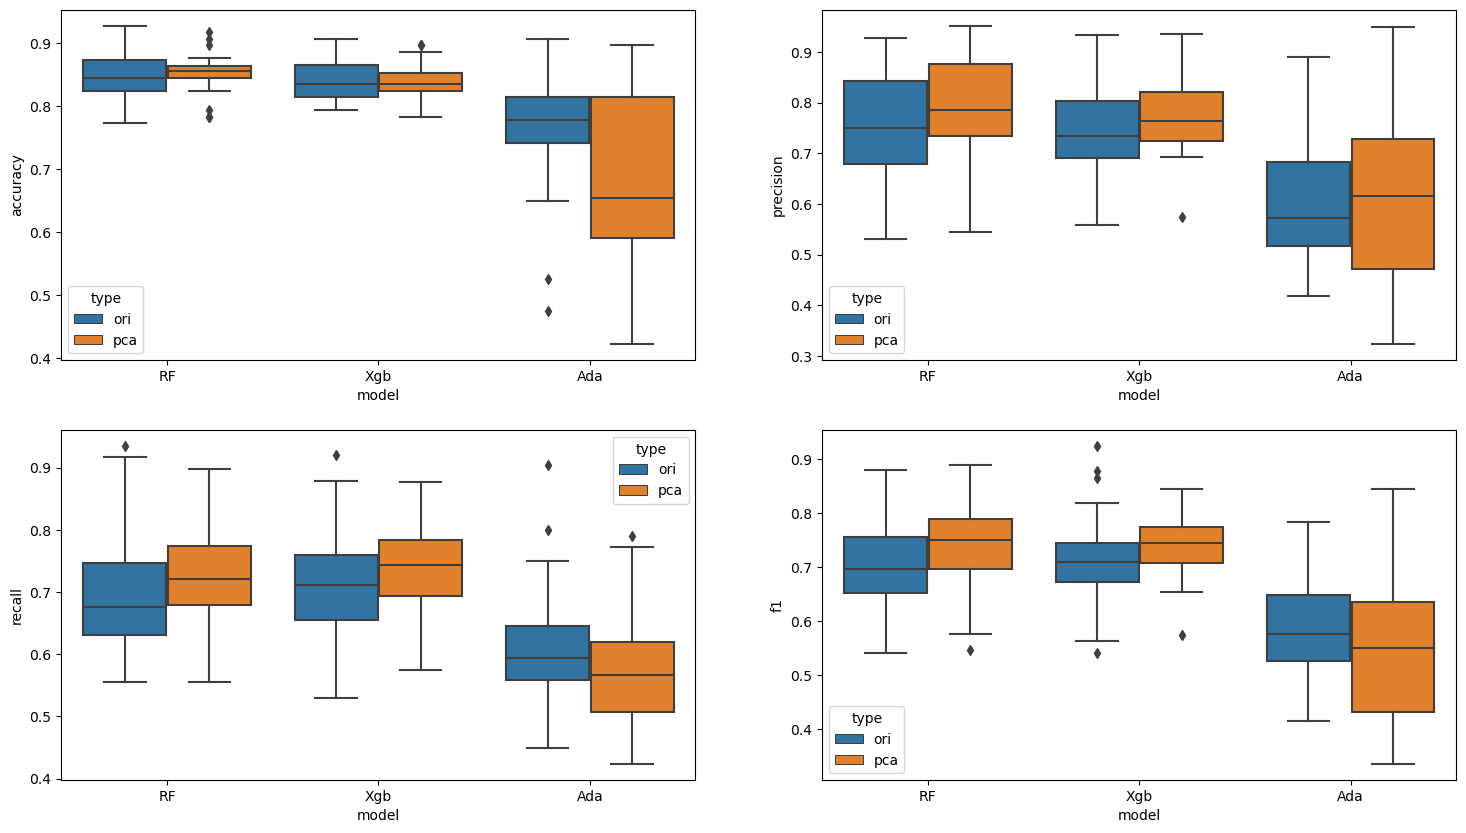

In [72]:
fig = plt.figure(figsize = (18,10), dpi = 100)
axs = fig.subplots(2,2).flatten()

_=sns.boxplot(data = model_df, x = 'model', y = 'accuracy', hue = 'type', ax = axs[0])
_=sns.boxplot(data = model_df, x = 'model', y = 'precision', hue = 'type', ax = axs[1])
_=sns.boxplot(data = model_df, x = 'model', y = 'recall', hue = 'type', ax = axs[2])
_=sns.boxplot(data = model_df, x = 'model', y = 'f1', hue = 'type', ax = axs[3])

# top important feature 구하기

## RandomForest

In [75]:
feature_importance_RF = pd.DataFrame()
for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rn = RandomForestClassifier(oob_score=True)
    model = rn.fit(X_train, y_train)
    
    feature_importance_RF['feature'] = mer_exp_qtNorm1.columns[1:-2]
    feature_importance_RF['iter_{}'.format(i+1)] = model.feature_importances_
    

feature_importance_RF['mean'] = feature_importance_RF.mean(axis=1)
feature_importance_RF = feature_importance_RF.sort_values('mean', ascending = False)
feature_importance_RF = feature_importance_RF.T
feature_importance_RF.columns = feature_importance_RF.loc['feature']
feature_importance_RF = feature_importance_RF.drop(['feature'])

  0%|                                                    | 0/30 [00:00<?, ?it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3561849656.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
  3%|█▍                                          | 1/30 [00:00<00:20,  1.44it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3561849656.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
  7%|██▉                                         | 2/30 [00:01<00:19,  1.42it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3561849656.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

 80%|██████████████████████████████████▍        | 24/30 [00:16<00:04,  1.49it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3561849656.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
 83%|███████████████████████████████████▊       | 25/30 [00:16<00:03,  1.47it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3561849656.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rn.fit(X_train, y_train)
 87%|█████████████████████████████████████▎     | 26/30 [00:17<00:02,  1.46it/s]/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3561849656.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

In [76]:
feature_importance_RF

feature,APOA4,IFNA16,INSRR,PRICKLE4,OR5I1,FGF6,RAX,IFNG,PTGER1,CRYGC,...,CHRNA6,TNFSF12,CCDC15,MMP3,PDE7B,PDE6H,SLC37A4,PSG2,JAM2,CRYBA2
iter_1,0.011145,0.0,0.005637,0.018676,0.006186,0.01296,0.0,0.006056,0.000865,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_2,0.005648,0.0,0.005986,0.017836,0.018312,0.0,0.0,0.0,0.0,0.017285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_3,0.005958,0.006121,0.013088,0.0,0.000802,0.0,0.00562,0.011939,0.011125,0.005746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_4,0.012681,0.005938,0.00589,0.00003,0.005781,0.018645,0.006477,0.012795,0.01151,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_5,0.0,0.017549,0.005089,0.018012,0.011375,0.0,0.005955,0.005901,0.005811,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_6,0.012639,0.011963,0.00013,0.011172,0.006546,0.0,0.0,0.00591,0.005672,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_7,0.012054,0.011898,0.0,0.000252,0.0,0.006265,0.0,0.019277,0.012763,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_8,0.011112,0.006297,0.011855,0.005953,0.012537,0.006258,0.0,0.01268,0.0,0.005512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_9,0.005457,0.006202,0.000768,0.006039,0.006456,0.011378,0.000619,0.005467,0.0,0.005963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_10,0.013106,0.005761,0.006181,0.005869,0.0,0.0,0.0,0.006103,0.006739,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
feature_importance_RF_10 = feature_importance_RF[feature_importance_RF.columns[0:10]]
feature_importance_RF_10 = feature_importance_RF_10.drop(['mean'])
feature_importance_RF_10

feature,APOA4,IFNA16,INSRR,PRICKLE4,OR5I1,FGF6,RAX,IFNG,PTGER1,CRYGC
iter_1,0.011145,0.0,0.005637,0.018676,0.006186,0.01296,0.0,0.006056,0.000865,0.0
iter_2,0.005648,0.0,0.005986,0.017836,0.018312,0.0,0.0,0.0,0.0,0.017285
iter_3,0.005958,0.006121,0.013088,0.0,0.000802,0.0,0.00562,0.011939,0.011125,0.005746
iter_4,0.012681,0.005938,0.00589,0.00003,0.005781,0.018645,0.006477,0.012795,0.01151,0.0
iter_5,0.0,0.017549,0.005089,0.018012,0.011375,0.0,0.005955,0.005901,0.005811,0.0
iter_6,0.012639,0.011963,0.00013,0.011172,0.006546,0.0,0.0,0.00591,0.005672,0.0
iter_7,0.012054,0.011898,0.0,0.000252,0.0,0.006265,0.0,0.019277,0.012763,0.0
iter_8,0.011112,0.006297,0.011855,0.005953,0.012537,0.006258,0.0,0.01268,0.0,0.005512
iter_9,0.005457,0.006202,0.000768,0.006039,0.006456,0.011378,0.000619,0.005467,0.0,0.005963
iter_10,0.013106,0.005761,0.006181,0.005869,0.0,0.0,0.0,0.006103,0.006739,0.0


In [78]:
feature_importance_RF_10 = feature_importance_RF[feature_importance_RF.columns[0:10]]
feature_importance_RF_10_mean = feature_importance_RF_10.loc[['mean'], :]
feature_importance_RF_10_mean

feature,APOA4,IFNA16,INSRR,PRICKLE4,OR5I1,FGF6,RAX,IFNG,PTGER1,CRYGC
mean,0.006959,0.006594,0.006299,0.006278,0.005848,0.00584,0.005689,0.005578,0.005533,0.005516


## original data - Xgb

In [79]:
feature_importance_XGB = pd.DataFrame()
for i in tqdm(range(30)):
    Xx_train, Xx_test, yx_train, yx_test = train_test_split(Xx, yx, test_size=0.2)
    xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=4)
    model = xgb.fit(Xx_train, yx_train)
    
    feature_importance_XGB['feature'] = mer_exp_qtNorm1.columns[1:-2]
    feature_importance_XGB['iter_{}'.format(i+1)] = model.feature_importances_
    

feature_importance_XGB['mean'] = feature_importance_XGB.mean(axis=1)
feature_importance_XGB = feature_importance_XGB.sort_values('mean', ascending = False)
feature_importance_XGB = feature_importance_XGB.T
feature_importance_XGB.columns = feature_importance_XGB.loc['feature']
feature_importance_XGB = feature_importance_XGB.drop(['feature'])

100%|███████████████████████████████████████████| 30/30 [06:18<00:00, 12.61s/it]
/var/folders/q8/fyqn7z113f31cxqptfcnbmb80000gn/T/ipykernel_24465/3039652192.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_importance_XGB['mean'] = feature_importance_XGB.mean(axis=1)


In [80]:
feature_importance_XGB

feature,SLC18A3,OR3A1,APOA4,MYOG,GPX5,RAX,GDF2,C1QB,ESRRB,INSRR,...,LRRC41,LRRC40,LRRC37A3,LRRC37A,LRRC23,LRRC20,LRRC2,LRRC1,LRPPRC,ZZZ3
iter_1,0.0,0.111176,0.0,0.079844,0.106547,0.22416,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_2,0.079167,0.079052,0.153972,0.048702,0.0,0.080898,0.0,0.0,0.0,0.036326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_3,0.074991,0.081003,0.0,0.121442,0.0,0.0,0.038289,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_4,0.06139,0.11072,0.0,0.0,0.0,0.0,0.0,0.0,0.140202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_5,0.044355,0.0,0.17216,0.0,0.091693,0.105528,0.0,0.117062,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_6,0.064139,0.033439,0.0,0.072726,0.0,0.077305,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_7,0.057486,0.082016,0.0,0.0,0.051776,0.085842,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_8,0.110941,0.083708,0.160004,0.0,0.033373,0.0,0.069703,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_9,0.057071,0.060755,0.125147,0.0,0.069778,0.0,0.06067,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_10,0.0,0.0,0.0,0.131969,0.060775,0.0,0.0,0.130406,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
feature_importance_XGB_10 = feature_importance_XGB[feature_importance_XGB.columns[0:10]]
feature_importance_XGB_10 = feature_importance_XGB_10.drop(['mean'])

In [82]:
feature_importance_XGB_10 = feature_importance_XGB[feature_importance_XGB.columns[0:10]]
feature_importance_XGB_10_mean = feature_importance_XGB_10.loc[['mean'], :]
feature_importance_XGB_10_mean

feature,SLC18A3,OR3A1,APOA4,MYOG,GPX5,RAX,GDF2,C1QB,ESRRB,INSRR
mean,0.064882,0.059169,0.058368,0.040779,0.040575,0.037609,0.016361,0.015146,0.014193,0.013884


## original data - Ada

In [83]:
feature_importance_Ada = pd.DataFrame()
for i in tqdm(range(30)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
    model = abc.fit(X_train, y_train)
    
    feature_importance_Ada['feature'] = mer_exp_qtNorm1.columns[1:-2]
    feature_importance_Ada['iter_{}'.format(i+1)] = model.feature_importances_
    

feature_importance_Ada['mean'] = feature_importance_Ada.mean(axis=1) 
feature_importance_Ada = feature_importance_Ada.sort_values('mean', ascending = False)
feature_importance_Ada = feature_importance_Ada.T
feature_importance_Ada.columns = feature_importance_Ada.loc['feature']
feature_importance_Ada = feature_importance_Ada.drop(['feature'])

  0%|                                                    | 0/30 [00:00<?, ?it/s]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|█▍                                          | 1/30 [00:07<03:35,  7.43s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  7%|██▉                                         | 2/30 [00:14<03:27,  7.40s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

 77%|████████████████████████████████▉          | 23/30 [02:51<00:52,  7.46s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 80%|██████████████████████████████████▍        | 24/30 [02:58<00:44,  7.44s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 83%|███████████████████████████████████▊       | 25/30 [03:06<00:37,  7.45s/it]/Users/kimyurim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [84]:
feature_importance_Ada

feature,DAB2,GNAS,SCO2,WRNIP1,S1PR4,PCBP2,PDAP1,NUMA1,CD72,SMOX,...,GMEB2,GMDS,GMCL1,GM2A,GLYR1,GLYAT,GLUL,GLUD2,GLUD1,ZZZ3
iter_1,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_2,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_4,0.48,0.0,0.0,0.0,0.42,0.0,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_5,0.0,0.06,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_6,0.06,0.06,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_7,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.46,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_9,0.02,0.18,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iter_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
feature_importance_Ada_10 = feature_importance_Ada[feature_importance_Ada.columns[0:10]]
feature_importance_Ada_10 = feature_importance_Ada_10.drop(['mean'])

In [86]:
feature_importance_Ada_10 = feature_importance_Ada[feature_importance_Ada.columns[0:10]]
feature_importance_Ada_10_mean = feature_importance_Ada_10.loc[['mean'], :]
feature_importance_Ada_10_mean

feature,DAB2,GNAS,SCO2,WRNIP1,S1PR4,PCBP2,PDAP1,NUMA1,CD72,SMOX
mean,0.072,0.066,0.039333,0.036,0.032,0.032,0.032,0.031333,0.030667,0.028


## feature importance hitmap

In [87]:
feature_importance_XGB_30 = feature_importance_XGB.astype('float')
feature_importance_XGB_30 = feature_importance_XGB_30[feature_importance_XGB_30.columns[:30]]
feature_importance_XGB_30 = feature_importance_XGB_30.drop(['mean'])
feature_importance_XGB_30

feature,SLC18A3,OR3A1,APOA4,MYOG,GPX5,RAX,GDF2,C1QB,ESRRB,INSRR,...,NDUFA13,SHANK1,TEX13B,STMN4,DAO,ACTL7B,SOAT2,FOXO3,CRYGA,HSPB8
iter_1,0.000000,0.111176,0.000000,0.079844,0.106547,0.224160,0.000000,0.000000,0.000000,0.000000,...,0.005611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003983,0.000000,0.000000
iter_2,0.079167,0.079052,0.153972,0.048702,0.000000,0.080898,0.000000,0.000000,0.000000,0.036326,...,0.006190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003482,0.000000,0.002432
iter_3,0.074991,0.081003,0.000000,0.121442,0.000000,0.000000,0.038289,0.000000,0.000000,0.000000,...,0.005020,0.148235,0.000000,0.000000,0.035250,0.000000,0.000000,0.006122,0.000000,0.005319
iter_4,0.061390,0.110720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140202,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007764,0.000000,0.003779
iter_5,0.044355,0.000000,0.172160,0.000000,0.091693,0.105528,0.000000,0.117062,0.000000,0.000000,...,0.006901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005131,0.000000,0.004629
iter_6,0.064139,0.033439,0.000000,0.072726,0.000000,0.077305,0.000000,0.000000,0.000000,0.000000,...,0.005223,0.000000,0.000000,0.000000,0.000000,0.000000,0.044961,0.005283,0.000000,0.004904
iter_7,0.057486,0.082016,0.000000,0.000000,0.051776,0.085842,0.000000,0.000000,0.000000,0.000000,...,0.006884,0.000000,0.000000,0.000000,0.000000,0.000000,0.093932,0.005992,0.000000,0.000690
iter_8,0.110941,0.083708,0.160004,0.000000,0.033373,0.000000,0.069703,0.000000,0.000000,0.000000,...,0.004647,0.000000,0.036618,0.000000,0.000000,0.000000,0.000000,0.002305,0.000000,0.000000
iter_9,0.057071,0.060755,0.125147,0.000000,0.069778,0.000000,0.060670,0.000000,0.000000,0.000000,...,0.008274,0.000000,0.028797,0.000000,0.000000,0.000000,0.000000,0.004806,0.000000,0.004883
iter_10,0.000000,0.000000,0.000000,0.131969,0.060775,0.000000,0.000000,0.130406,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009097


<AxesSubplot:xlabel='feature'>

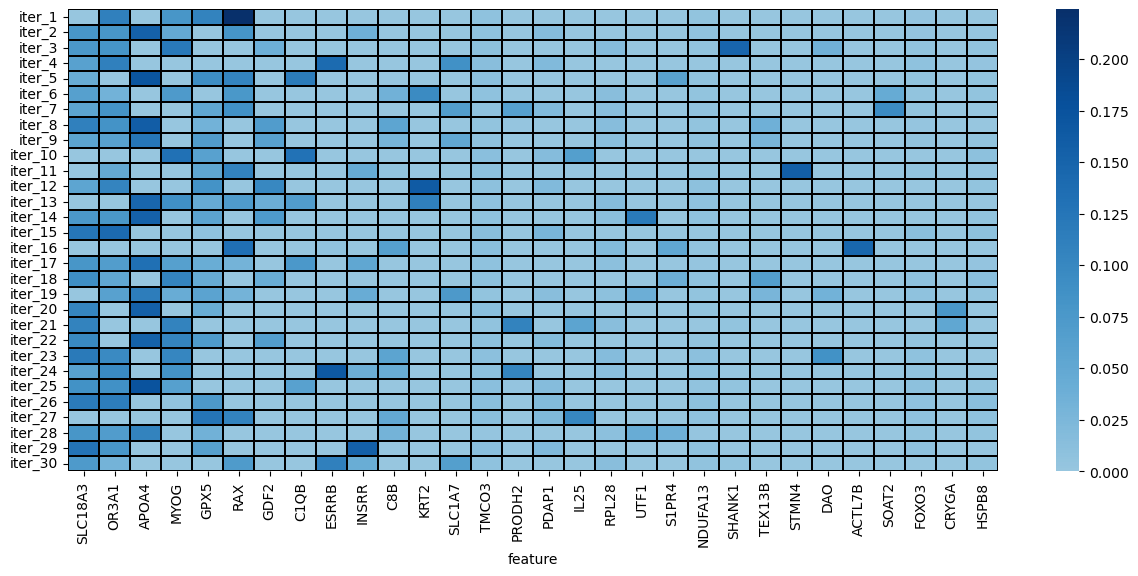

In [88]:
fig1 = plt.figure(figsize = (15,6), dpi = 100)
sns.heatmap(feature_importance_XGB_30, cmap = 'Blues', center = 0.04, linewidths = 0.1, linecolor = 'black')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


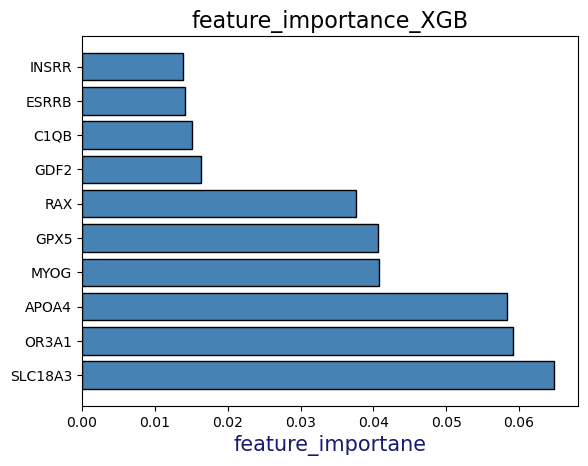

In [89]:
feature_importance_XGB_10 = feature_importance_XGB[feature_importance_XGB.columns[0:10]]
feature_importance_XGB_10_mean = feature_importance_XGB_10.loc[['mean'], :]
name1 = feature_importance_XGB_10_mean.columns

_=plt.barh(name1, feature_importance_XGB_10_mean.loc['mean'].values, edgecolor = 'k', color = 'steelblue')
_=plt.xlabel('feature_importane', fontsize = 15, color = 'midnightblue')
_=plt.title('feature_importance_XGB', fontsize = 16)


In [90]:
name1

Index(['SLC18A3', 'OR3A1', 'APOA4', 'MYOG', 'GPX5', 'RAX', 'GDF2', 'C1QB',
       'ESRRB', 'INSRR'],
      dtype='object', name='feature')

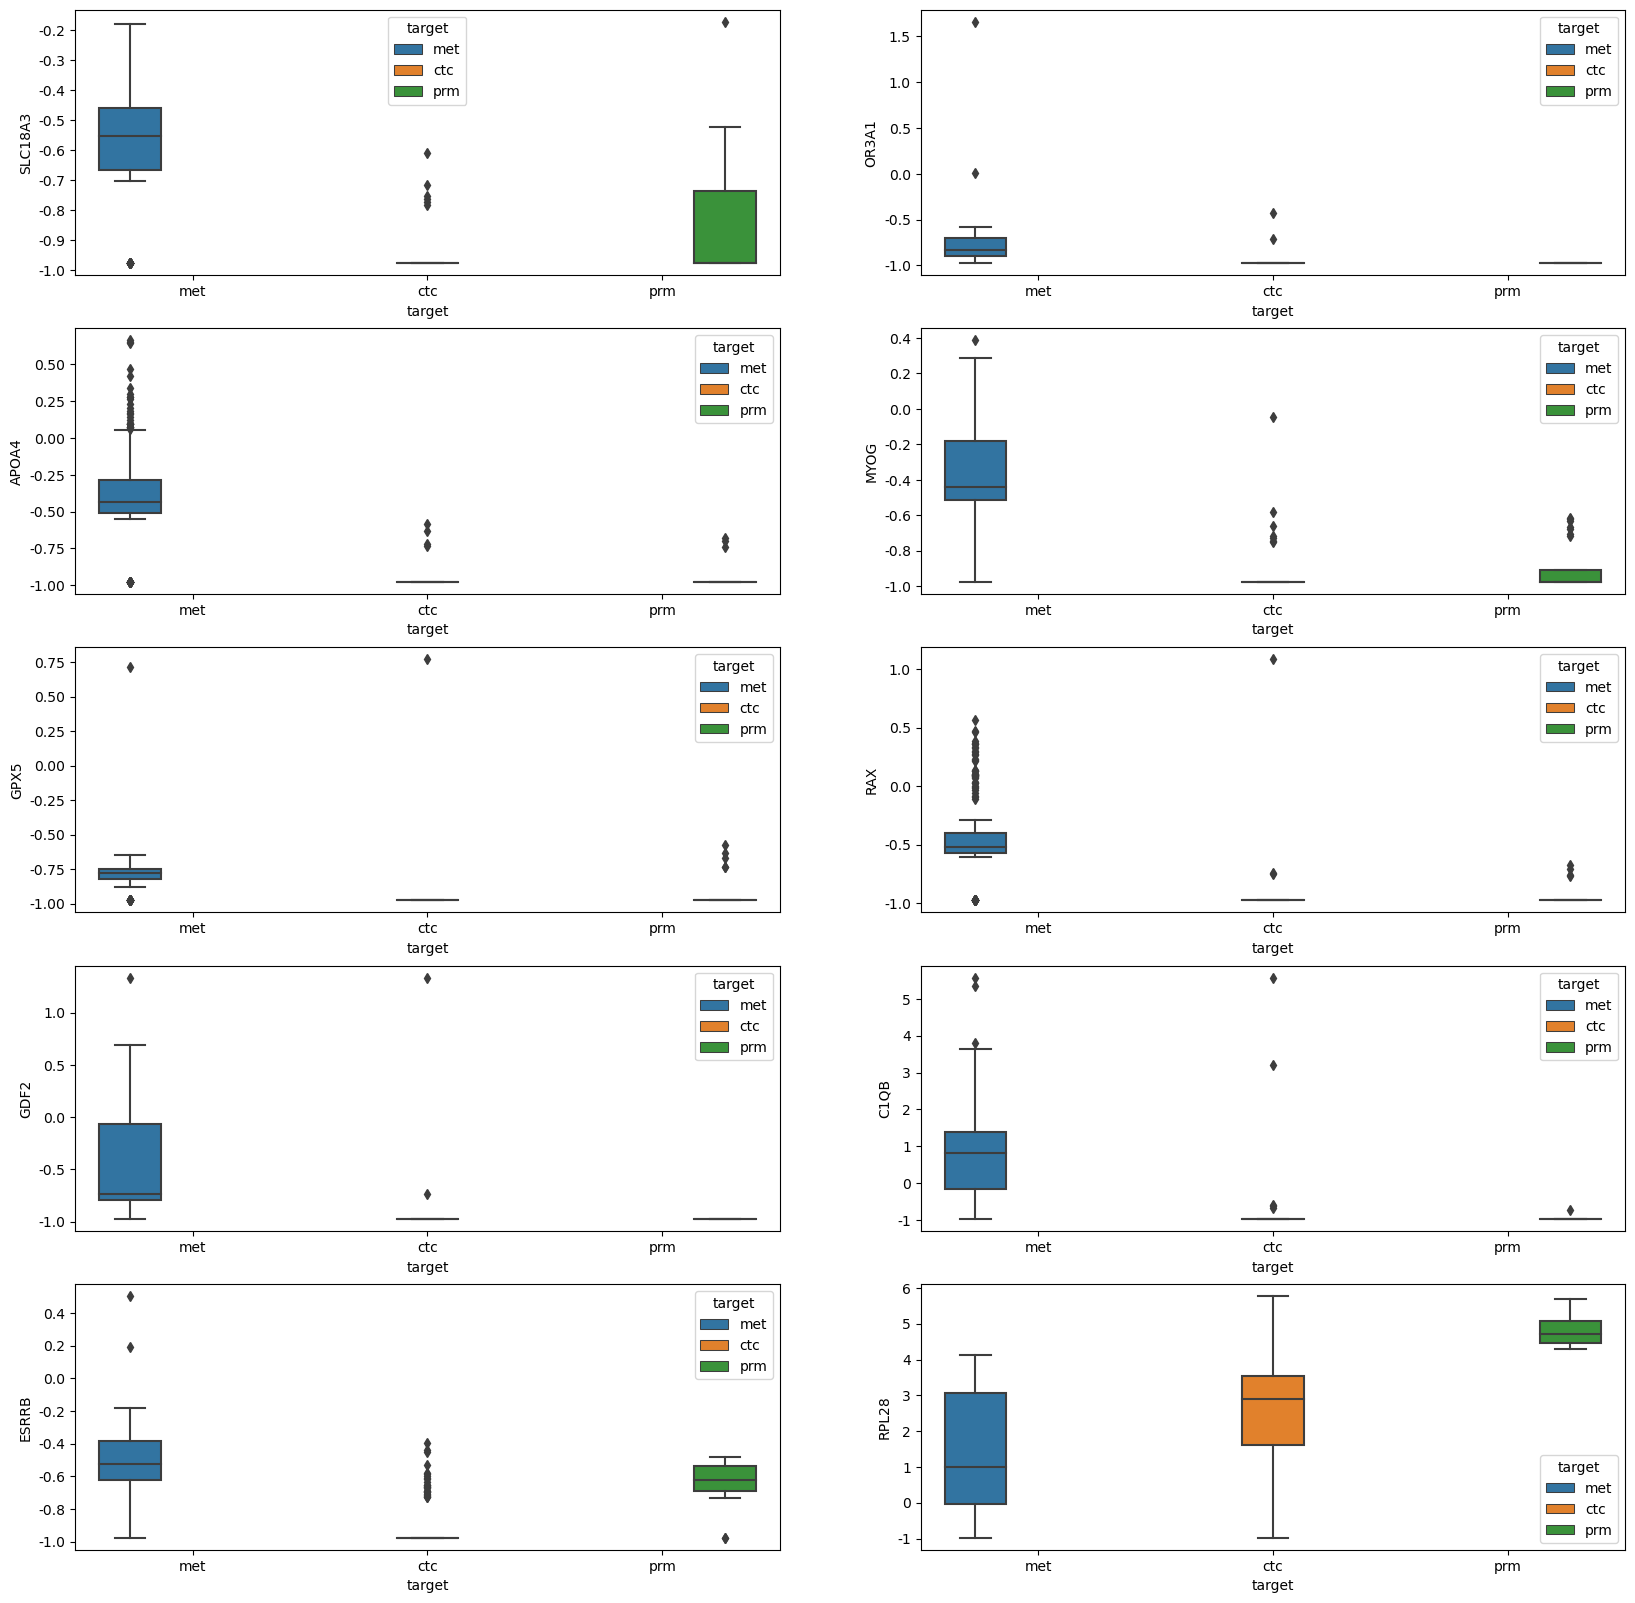

In [120]:
fig = plt.figure(figsize = (20,20), dpi = 100)
axs = fig.subplots(5,2).flatten()

_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'SLC18A3', hue = 'target', ax = axs[0])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'OR3A1', hue = 'target', ax = axs[1])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'APOA4', hue = 'target', ax = axs[2])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'MYOG', hue = 'target', ax = axs[3])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'GPX5', hue = 'target', ax = axs[4])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'RAX', hue = 'target', ax = axs[5])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'GDF2', hue = 'target', ax = axs[6])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'C1QB', hue = 'target', ax = axs[7])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'ESRRB', hue = 'target', ax = axs[8])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'RPL28', hue = 'target', ax = axs[9])